In [ ]:
#installing packages
!pip install python-whois
!pip install validators

In [ ]:
import pandas as pd
import seaborn as sns
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
from datetime import datetime
import whois
import time
from urllib.parse import urlparse
import validators
import bs4
import socket

# Goal: Develop a Malicious URL Detector

One of the most important steps is that to give a clear definition of the goal, I aim to achieve: developing an ML-Enhanced tool called the **Malicious URL Detector**.

### **What are Malicious URLs?**
Malicious URLs—also referred to as abnormal or suspicious URLs—are web addresses exhibiting patterns or behaviors indicative of cyber threats such as phishing, malware distribution, or other deceptive practices. These URLs pose significant risks to users and organizations.

### **Key Characteristics of Malicious URLs**
To understand what sets malicious URLs apart, here are some common traits:  
1. **Misspelled Domain Names**: Attackers often register domains resembling legitimate websites but include subtle misspellings or variations (e.g., *goo-gle.com* instead of *google.com*).  
2. **Use of IP Addresses Instead of Domains**: Some malicious URLs use raw IP addresses rather than domain names to bypass domain registration and complicate tracking.  
3. **Long, Random Strings**: URLs containing long, random strings of characters often aim to obscure their true purpose.  
4. **Unusual Characters or Symbols**: Excessive use of special characters, such as hyphens or underscores, can be a tactic to confuse users or evade detection systems.  
5. **Lack of HTTPS**: Phishing sites often avoid using valid SSL certificates (HTTPS), making them less secure and more suspect.  
6. **Excessive Subdirectories**: Malicious URLs might include a large number of subdirectories to obfuscate the true destination.  
7. **Suspicious or Uncommon TLDs**: Attackers may use less familiar or dubious top-level domains (TLDs) to make the URL appear misleading.

### **The Importance of Malicious URL Detection**
Detecting malicious URLs is critical in modern cybersecurity to combat phishing, malware, and other digital threats. Numerous methods and tools are employed for this purpose, including:  
- **URL Scanners**  
- **Machine Learning Algorithms**  
- **Heuristic Techniques**  

These technologies are integral to the security and networking features of contemporary applications. By analyzing the wealth of existing approaches, I'm committed to designing a robust solution, carefully justifying and documenting each step of our process to deliver meaningful and impactful results.

# Data Acquisition: Foundation of the Malicious URL Detector

The **data acquisition** phase is a crucial step in the process of building a Machine Learning (ML) algorithm. During this phase, I gather, extract, and organize the datasets that will be used to train and test our models. The first task is to identify where our data resides. For this purpose, I have selected two reliable sources for obtaining **malicious** and **benign URLs**:

- **[PhishTank](https://phishtank.com/):** A free community-driven platform where users can submit, verify, track, and share phishing-related data.  
- **[Kaggle](https://www.kaggle.com/):** A well-known platform for data science competitions, where datasets are shared for analysis and modeling.

Specifically, I downloaded two `.csv` files: the first one, sourced directly from PhishTank, contains only entries related to malicious URLs. The second file, obtained from Kaggle, I already know that requires preprocessing and cleaning, as it includes various entries (malicious and benign URLs), but we already have a dataset that conatins only malignous URLs so I will extract only the benign URLs for our purposes.

### **The Importance of Quality Data**  
It’s critical to note that the success of an ML model largely depends on the quality and relevance of the data it is trained on. Recognizing this, I prioritized datasets that are:  
1. **Regularly Updated:** Ensuring the data reflects current trends and threats.  
2. **Well-Referenced:** Datasets contributed by trusted and reputable sources.  
3. **Community-Contributed:** Benefiting from active collaboration and verification by experts.

My search criteria were guided by these principles to ensure robust and meaningful results during the training and evaluation phases of the project.

Additionally, due to the large amount of data I fortunately found, I was able to run multiple tests by creating two datasets. One smaller, consisting of a total of 10,000 entries, and the second larger, with 40,000 entries. This choice was made in order to assess whether there would be improvements and how much better the models trained on the different datasets would perform.

## Malicious URL Dataset (Phishtank)

In [ ]:
# Read in the data from the CSV file into a data frame
df1 = pd.read_csv('./data/verified_online.csv')

In [ ]:
# Drop features that are not meaningful for our studies
df1 = df1.drop(['phish_id', 'phish_detail_url', 'submission_time', 'verified', 'verification_time', 'online', 'target'], axis=1)

In [ ]:
df1

,url
0,https://reaffectation.com/index.php
1,https://test.privatefinanceaces.com/src/nedban...
2,https://www.es-inicio-ingcliente.com/
3,https://www.ingmovil-inicios-es.com/
4,https://www.ingcliente-es-movil.com/
...,...
59938,http://www.ezblox.site/free/jennifer111/helpdesk
59939,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
59940,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
59941,http://www.habbocreditosparati.blogspot.com/


In [ ]:
# # Rimuovi le righe dove 'url' contiene "http://" e non "https://"
# df_cleaned = df1[~df1['url'].str.startswith('http://')]
# df_cleaned = df_cleaned.reset_index(drop=True)
# print("DataFrame dopo la rimozione:")
# print(df_cleaned)

## Benign URL Dataset (Kaggle)

In [ ]:
#Loading benign urls
df2 = pd.read_csv("./data/urldata.csv")
# Rename columns
df2.columns=['index', 'url', 'type', 'number']
# Brief Preview of the unwanted data
df2.tail()

,index,url,type,number
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1
450174,450174,http://atualizapj.com/,malicious,1
450175,450175,http://writeassociate.com/test/Portal/inicio/I...,malicious,1


In [ ]:
# Drop features that will not be meaningful for our studies
df2 = df2.drop(['index', 'number'], axis=1)
# Filter only the benign type of URLs
df2 = df2[df2['type'] == 'benign']
df2.tail()

,url,type
345733,https://taekwondo.wisebytes.net/,benign
345734,https://www.steveconway.net/,benign
345735,https://www.tkd.net/,benign
345736,https://www.taekwondobible.com/,benign
345737,https://www.angelfire.com/mi2/540/,benign


# Data Preprocessing

Data preprocessing techniques are essential for improving data quality, which directly impacts the accuracy and efficiency of the subsequent machine learning process. As a crucial step in the knowledge discovery pipeline, preprocessing ensures that quality decisions are based on quality data. Detecting anomalies, rectifying them early, and reducing the data to be analyzed can yield significant benefits for decision-making. The key steps undertaken so far include the following:

1. **Handling Correctness of Values**: Identify and address any missing, null, or malformed values within the dataset to ensure data integrity.  

2. **Handling Imbalanced Classes**: Address class imbalances to prevent the model from biasing toward the majority class. Techniques such as resampling (oversampling or undersampling) or specialized algorithms can be applied.  

3. **Data Transformation**: Apply transformations to variables as needed. This might include scaling numeric features, encoding categorical variables, or other adjustments to make the data compatible with the chosen ML algorithm.  

4. **Feature Engineering**: Generate new features or modify existing ones to provide more meaningful inputs to the model. This enhances the model’s ability to detect and learn relevant patterns in the data.  

5. **Handling Categorical Variables**: Convert categorical variables into formats suitable for ML algorithms. Techniques such as one-hot encoding, label encoding, or binary encoding may be employed.  

6. **Normalization and Standardization**: Depending on the requirements of the ML algorithm, normalize or standardize data to ensure that features are on comparable scales, which can improve model performance.  


## Data Cleaning

Data cleaning is an essential process that focuses on identifying and rectifying errors, inconsistencies, and inaccuracies within the dataset. This step ensures that the data is of high quality and is properly prepared for training a model.


### Missing or Null URLs

Even though the data sources claim that the databases are regularly updated and preprocessed, I will take an additional step to ensure that the database contains no missing or null URLs. As we will see below there aren't missing or null URLs


In [ ]:
# For the malicious dataset false means that the row is not null (if it was null the value was true)
df1.isnull().value_counts()

,count
url,
False,59943


In [ ]:
# For the benign dataset
df2.isnull().value_counts()

,,count
url,type,
False,False,345738


### Malformed URL

Malformed URLs, also referred to as incorrectly formed or improperly constructed URLs, are web addresses that do not comply with the standard syntax and structure necessary for proper functionality on the internet. These URLs may contain errors, omissions, or incorrect components that hinder web browsers from properly interpreting and accessing the intended resource. As we will see below infact there was 538 malformed URLs inside the first dataset and 1759 inside the second dataset

In [ ]:
# Checks if the URL is malformed or not
def malformed_url(url):
    return 0 if validators.url(url) else 1

In [ ]:
# Malicious URL Data Set
rows_before = len(df1)
df1 = df1[df1['url'].apply(malformed_url) != 1]
df1 = df1.reset_index(drop=True)
rows_after = len(df1)
result = rows_before - rows_after
print(result)
df1

538


,url
0,https://reaffectation.com/index.php
1,https://test.privatefinanceaces.com/src/nedban...
2,https://www.es-inicio-ingcliente.com/
3,https://www.ingmovil-inicios-es.com/
4,https://www.ingcliente-es-movil.com/
...,...
59400,http://www.ezblox.site/free/jennifer111/helpdesk
59401,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
59402,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...
59403,http://www.habbocreditosparati.blogspot.com/


In [ ]:
# Benign URL Data Set
rows_before = len(df2)
df2 = df2[df2['url'].apply(malformed_url) != 1]
df2 = df2.reset_index(drop=True)
rows_after = len(df2)
result = rows_before - rows_after
print(result)
df2

1759


,url,type
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign
...,...,...
343974,https://taekwondo.wisebytes.net/,benign
343975,https://www.steveconway.net/,benign
343976,https://www.tkd.net/,benign
343977,https://www.taekwondobible.com/,benign


## **Class Imbalance Problem**

The **class imbalance problem** arises in machine learning when one class in the dataset has a significantly lower number of samples compared to the other class(es). In the case of **malicious URLs**, this issue can become particularly significant and problematic. The imbalance may cause a range of complications, including:

- **Biased models** that favor the majority class.
- **Misleading accuracy** metrics, which do not truly reflect the model's performance on both classes.
- **Low sensitivity** to identifying malicious URLs, leading to poor detection of harmful web addresses.

To address the class imbalance problem when dealing with malicious URLs, various strategies can be adopted to enhance model performance and ensure balanced outcomes:

1. **Resampling**:
   - **Over-sampling**: Increase the number of samples in the minority class (malicious URLs) by duplicating or generating synthetic samples.
   - **Under-sampling**: Reduce the number of samples in the majority class (benign URLs) by removing some of them.
   
2. **Cost-Sensitive Learning**:
   - Introduce different misclassification costs for each class, penalizing misclassifications of the minority class (malicious URLs) more heavily than those of the majority class. This helps the model to focus more on correctly identifying rare events.

3. **Anomaly Detection**:
   - Treat the detection of **malicious URLs** as an **anomaly detection** problem, where the model focuses on recognizing rare and unusual events (malicious URLs), which are significantly outnumbered by benign URLs.

4. **Evaluation Metrics**:
   - In imbalanced datasets, metrics like **precision**, **recall**, and **F1-score** become more informative than traditional **accuracy**. These metrics offer a more balanced view of model performance, especially when the classes are not evenly distributed.

5. **Ensemble Methods**:
   - Use **ensemble techniques** such as **bagging**, **boosting**, and **stacking**, which combine the predictions of multiple models to improve the overall ability to handle class imbalance and boost the model's accuracy and robustness.

### **My Approach**

As I said, I found datasets that include a sufficient number of samples for both classes: **'Malicious'** and **'Benign'**. To ensure a balanced representation, I deliberately limited my sample size to **5000 instances** for each class for the first dataset and for the bigger one i choose to put 20000 sample to each classes. This has resulted in two **class-balanced** dataset, which will allow for more accurate and reliable model training and evaluation.


### Collecting Malicious URLs

In [ ]:
#Collecting 5,000 malicious URLs randomly
malicious_url = df1.sample(n = 5000, random_state = 25).copy()
malicious_url = malicious_url.reset_index(drop=True)

#Collecting 20,000 malicious URLs randomly (bigger dataset)
bigmalicious_url = df1.sample(n = 20000, random_state = 10).copy()
bigmalicious_url = bigmalicious_url.reset_index(drop=True)
malicious_url

,url
0,https://shorturl.at/aO3x7
1,https://docs.google.com/presentation/d/e/2PACX...
2,https://did.li/dO2CN
3,https://docs.google.com/presentation/d/e/2PACX...
4,https://usps.com-trackymr.vip/
...,...
4995,https://mail-cytanet.pages.dev
4996,https://giftredeme.info/
4997,http://tgweb.revision.uz
4998,https://ethereum-org.dex-dd.com/


### Collecting Benign URLs

In [ ]:
#Collecting 5,000 benign URLs randomly
benign_url = df2.sample(n = 5000, random_state = 25).copy()
benign_url = benign_url.reset_index(drop=True)

#Collecting 20,000 benign URLs randomly (bigger dataset)
bigbenign_url = df2.sample(n = 20000, random_state = 10).copy()
bigbenign_url = bigbenign_url.reset_index(drop=True)

bigbenign_url

,url,type
0,https://www.linkedin.com/directory/people/bron...,benign
1,https://www.myspace.com/kathyannbelgrave/music,benign
2,https://www.lyrics007.com/Christina%20Aguilera...,benign
3,https://www.canalmuseum.org.uk/history/tunnels...,benign
4,https://www.youtube.com/watch?v=jG_YNWFsgic,benign
...,...,...
19995,https://www.nodc.noaa.gov/OC5/SELECT/accession...,benign
19996,https://www.imdb.com/name/nm0001569/,benign
19997,https://www.mylovedpornstars.com/free/pics/din...,benign
19998,https://www.westernautoplaza.net/,benign


## Feature Engineering

Features are extracted from the URL string, with a focus on **address bar-based features**. The reason for this is that malicious URLs typically differ in appearance from benign ones. By analyzing these differences, I can extract statistical properties that help quantify them.

- A common strategy employed by attackers is to disguise a malicious URL to resemble a legitimate one. This is often achieved by mimicking well-known brand names and making small modifications, such as in the cases of (*googleinfo.com*, *apple-support.com*).

Studies on phishing URL detection show that URLs exhibit distinct alphabetic patterns depending on their type. By 'Alphabetic Distribution,' we refer to aspects like the sequence of characters in the URL, their complexity, and related features. Commonly used lexical features often include statistical properties such as the URL’s length, scheme, path length, number of subdirectories, and more.

### Domain Name

In [ ]:
def get_domain(url):
    return urlparse(url).netloc

### Length of an URL

It measures the length of the URL. Cybercriminals often use long URLs to hide suspicious elements in the address bar, particularly when the '@' symbol is involved (as discussed below), but analyzing the dataset I found that a lot of phishing url are instead very short, we will see later a later point as like the calculation of the lenght that will be performed within the feature_extraction function.

### Number presence

A common characteristic of malicious URLs is the presence of numbers in the domain or path. These numbers are often used to mask the true nature of the URL or to create a fake appearance of legitimacy.

In [ ]:
def has_number(domain):
    return 1 if any(char.isdigit() for char in domain) else 0

### @ Symbol in URL

The "@" symbol in a URL is traditionally used to separate the username and password from the rest of the URL, especially when authentication is required by a web page. However, its use for authentication has become less common in modern web practices due to security concerns. When it comes to malicious URLs, there are several potential implications:

1. **Username and Password Spoofing**: Malicious actors may exploit the "@" symbol to impersonate a legitimate website by embedding fake authentication credentials within the URL. This is a form of social engineering intended to trick users into entering their actual username and password.

2. **Credential Harvesting**: During phishing attacks, attackers might create URLs with fake authentication prompts that contain the "@" symbol. This can mislead users into thinking they need to input their credentials to access a site, when in reality, the attacker is capturing this information.

3. **Legacy Vulnerabilities**: Older systems or software that don’t correctly process URLs might misinterpret the "@" symbol, potentially exposing sensitive information. This is more common with outdated applications.

4. **Security Logging and Monitoring**: Directly including usernames and passwords in URLs is generally discouraged for security reasons. If detected by security systems, this practice could trigger a warning and prompt further scrutiny.

It’s worth noting that legitimate websites typically avoid using the "@" symbol in URLs for authentication. Instead, they rely on more secure methods such as tokens, session cookies, or modern authentication protocols like OAuth.

Because of these reasons, the "@" symbol in URLs can be a potential red flag for suspicious or malicious activity. Users should be cautious when encountering URLs that include authentication information in this manner.

In [ ]:
def ats_count(url):
    return url.count('@')

### HTTPS Presence

The use of the HTTPS (Hypertext Transfer Protocol Secure) protocol is essential for internet security as it encrypts the data exchanged between a user's browser and a website. Malicious URLs, however, are links designed to deceive or harm users. The connection between HTTPS and malicious URLs is twofold:

- **Mitigation of Man-in-the-Middle Attacks**: HTTPS ensures that the data transmitted between the user's browser and the website is encrypted. This encryption protects against eavesdroppers who might attempt to intercept and read sensitive information.

- **Trust and Authenticity**: HTTPS also offers a mechanism to authenticate the identity of a website. This helps users confirm that they are connecting to a legitimate website, rather than a fraudulent one.

In [ ]:
# We need to make some assumptions:
# 1. every URL starts with http/https.
# 2. all the protocol that are not 'https' are flagged as negative.
def is_https(url):
    return 1 if url.startswith("https") else 0

### Hyphen in URL

Malicious actors may use hyphens in URLs as part of various techniques to create deceptive or fraudulent web addresses. These techniques can include:

- **Domain Spoofing**: Cybercriminals might register domains that closely resemble legitimate ones, often using hyphens to mimic spaces or separate words. For instance, they might register "face-book.com" to resemble "facebook.com".

- **Subdomain Manipulation**: Attackers may incorporate hyphens in subdomains to craft URLs that look similar to legitimate subdomains. For example, they could use "log-in" to imitate "login".

- **URL Obfuscation**: Hyphens can be combined with other characters or techniques to obfuscate parts of a URL, making it more difficult for users to recognize the actual destination.

Although hyphens by themselves do not indicate malicious intent, they can be used in deceptive tactics. It’s important for users to be cautious and verify URLs, particularly when clicking on links in emails or messages. Paying attention to details like domain names, subdomains, and unusual characters in URLs can assist users in identifying potentially malicious web addresses.

In [ ]:
# Check if the network location part contains the '-' symbol
def has_hyphen(url):
    return 1 if '-' in urlparse(url).netloc else 0

### Underscore in URL

Malicious actors may exploit underscores in URLs to create deceptive or confusing web addresses. They might do this to:

- **Obfuscate**: Cybercriminals can use underscores to obscure parts of a URL, making it more difficult for users to identify the true destination.

- **Mimic Legitimate URLs**: They may craft URLs with underscores that closely resemble well-known websites or services, attempting to deceive users into thinking they're visiting a trusted site.

- **Evade Detection**: Some security tools or filters may struggle to effectively analyze or categorize URLs containing underscores, potentially allowing them to bypass certain security measures.

- **Phishing**: Phishers could use URLs with underscores to create convincing links that lead to fake login pages, with the intention of stealing user credentials.

While underscores themselves are not inherently malicious, their use in URLs can be exploited for deceptive purposes. This is why best practices typically recommend using hyphens (-) instead of underscores (_) in URLs, as hyphens improve readability and compatibility with various systems. Following established conventions helps minimize the risk of encountering issues related to URL formatting and ensures a smoother user experience.


In [ ]:
# Check if the URL contains the '_' symbol
def underscore_count(url):
    return url.count('_')

### Bare IPv4 or Domain

The use of raw IPv4 addresses in the domain part of a URL can sometimes indicate malicious intent or suspicious activity. Here's why:

1. **Lack of Legitimacy**: Websites generally use human-readable domain names (like www.example.com) instead of raw IP addresses. When a user encounters a URL with just an IP address in the domain part (e.g., http://192.168.0.1), it can raise suspicions, as it doesn't align with standard web practices.

2. **Phishing and Spoofing**: Attackers may use raw IP addresses to bypass domain reputation checks or to impersonate legitimate websites. For instance, they could use an IP address that closely resembles a well-known site to deceive users.

3. **Avoiding DNS Logs**: By using raw IP addresses, attackers can evade DNS logs, making it harder to trace their activities back to a specific domain.

4. **Obscuring Ownership**: An IP address can make it more difficult to identify the owner or controller of a website compared to using a registered domain name.

5. **Scanning and Enumeration**: In some cases, attackers might use raw IP addresses to scan for vulnerable hosts or conduct reconnaissance on a network.

That said, it's important to note that not all instances of raw IPv4 addresses in URLs are malicious. There are legitimate cases, such as accessing resources on a local network or connecting to servers directly via their IP addresses.


In [ ]:
# Checks if the network location is a Bare IPv4 or a Domain Name
def having_ip_address(url):
    try:
        socket.inet_aton(urlparse(url).netloc)
        return 1
    except:
        return 0

### Depth of URLs

The "depth" of a URL refers to how many levels or directories a page is from the root domain. For instance, in the URL https://www.example.com/path/page.html, the depth is 2 because the page is located two levels deep from the root domain. When considering security and web crawling:

- **Avoidance of Detection**: Some security systems may be less likely to scan or analyze deeply nested URLs, giving attackers an opportunity to conceal malicious content.

- **Deceptive Practices**: Using deep URLs, attackers can make it more difficult for users to discern whether they are on a legitimate website or a fraudulent one.

- **Obfuscation**: Malicious actors may use deep URLs to hide the true location of a webpage. By placing a malicious page deep within a website’s directory structure, they make it harder to find.

- **Phishing**: Attackers might craft deep URLs with long paths to make them appear more legitimate. For example, they may use https://www.example.com/login to mimic a real login page.

- **SEO Manipulation**: In certain cases, malicious actors may use deep URLs containing keywords or terms related to their harmful content to manipulate search engine rankings.

While deep URLs themselves are not inherently malicious, they can be used as part of a larger strategy to deceive or conceal malicious content. Therefore, it is important for both users and security systems to remain vigilant and thoroughly scrutinize URLs, regardless of their depth.


In [ ]:
# count the number of '/' inside the URL
def url_depth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth = depth+1
    return depth

### Country Code Top-Level Domain in a URL

The country code top-level domain (ccTLD) in a URL refers to the specific two-letter code that identifies a country or territory. For example, ".us" is the ccTLD for the United States, ".uk" for the United Kingdom, and so on. The ccTLD is designed to indicate the geographical origin or association of a website.

Here are some considerations regarding the relationship between the country code of a top-level domain and potentially malicious URLs:

1. **Phishing and Spoofing**: Attackers may register domains with ccTLDs that resemble those of legitimate organizations or government entities to trick users. For example, they might use a ccTLD similar to that of a well-known bank.

2. **Targeted Attacks**: Malicious actors may exploit ccTLDs to carry out targeted attacks. They could use a ccTLD linked to a particular country to deceive users into believing the website is local and trustworthy.

3. **Legitimate Use**: Many websites use country-specific ccTLDs to signify their geographical focus or to establish trust with users in a specific region. For instance, a business in the United Kingdom might use a ".uk" domain.

4. **Evading Detection**: Using a ccTLD associated with a specific region allows attackers to bypass detection by security systems that focus primarily on global TLDs (e.g., .com, .org).

5. **Regional Content**: Legitimate websites may utilize ccTLDs to serve content tailored to particular regions. This can enhance the user experience by providing localized information.

6. **Government and Educational Institutions**: Certain ccTLDs are reserved for use by government entities or educational institutions. These domains are typically trusted and subject to strict regulations.

7. **Global Reach**: While ccTLDs are linked to specific countries or territories, they are not exclusive to entities within those countries. Anyone can register a ccTLD, meaning their use does not necessarily indicate the physical location of the registrant.

It's important to note that while the ccTLD can provide some context regarding the origin or focus of a website, it is not a definitive sign of whether a URL is malicious. Malicious actors can use any TLD, including ccTLDs, to host harmful content. Therefore, it's essential to consider other factors such as the domain name, subdomains, and website content. Additionally, employing security tools and following safe browsing practices can help safeguard against potentially malicious URLs, regardless of the ccTLD.


In [ ]:
# ccTLD-Region
ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }

def get_url_cctld(tld):

    for ccTLD in ccTLD_to_region:
        if tld.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]

    return "Global"

### Extract the Features and Combine the Datasets


In [ ]:
def extract_features(url,label):
    features = []
    # url
    features.append(url)
    # domain of url
    features.append(get_domain(url))
    # cctld of url
    features.append(get_url_cctld(get_domain(url)))
    # length of url
    features.append(len(url))
    # Use of https or not
    features.append(is_https(url))
    # Use of IP or not in domain
    features.append(having_ip_address(url))
    # has hyphen or not in domain part
    features.append(has_hyphen(url))
    # @ symbol in url
    features.append(ats_count(url))
    # _ symbol count in url
    features.append(underscore_count(url))
    # depth of url
    features.append(url_depth(url))
    # has_number
    features.append(has_number(get_domain(url)))

    features.append(label)
    return features


In [ ]:
feature_names = ['url', 'domain', 'cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth', 'has_number', 'label']

In [ ]:
#Extracting the feautres and storing them in a list
benign_features = []
label = 0 # benign

for i in range(0, len(benign_url.index)):
    url = benign_url['url'][i]
    benign_features.append(extract_features(url,label))


benign = pd.DataFrame(benign_features, columns= feature_names)

In [ ]:
#Extracting the feautres and storing them in a list (for bigger dataset)
benign_features = []
label = 0 # benign

for i in range(0, len(bigbenign_url.index)):
    url = bigbenign_url['url'][i]
    benign_features.append(extract_features(url,label))


bigbenign = pd.DataFrame(benign_features, columns= feature_names)

In [ ]:
benign

,url,domain,cctld,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
0,https://www.en.wikipedia.org/wiki/EA_Games,www.en.wikipedia.org,Global,42,1,0,0,0,1,2,0,0
1,https://www.tunein.com/radio/Plan%c3%a8te-Jazz...,www.tunein.com,Global,58,1,0,0,0,0,2,0,0
2,https://www.ilike.com/artist/Jean-Pierre+Ferla...,www.ilike.com,Global,75,1,0,0,0,0,4,0,0
3,https://www.dbpedia.org/resource/2007%E2%80%93...,www.dbpedia.org,Global,91,1,0,0,0,5,2,0,0
4,https://www.linkedin.com/in/timothymhaynes,www.linkedin.com,Global,42,1,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://www.aviationpros.com/news/10385119/mes...,www.aviationpros.com,Global,67,1,0,0,0,0,3,0,0
4996,https://www.artnet.com/Magazine/features/kuspi...,www.artnet.com,Global,65,1,0,0,0,0,4,0,0
4997,https://www.familytreemaker.genealogy.com/user...,www.familytreemaker.genealogy.com,Global,100,1,0,0,0,0,7,0,0
4998,https://www.amtrakvacations.com/montreal-qc/gr...,www.amtrakvacations.com,Global,87,1,0,0,0,0,2,0,0


In [ ]:
#Extracting the feautres & storing them in a list
malicious_features = []
label = 1 # malicious

for i in range(0, len(malicious_url.index)):
    url = malicious_url['url'][i]
    malicious_features.append(extract_features(url,label))

malicious = pd.DataFrame(malicious_features, columns= feature_names)

In [ ]:
#Extracting the feautres & storing them in a list (for bigger dataset)
malicious_features = []
label = 1 # malicious

for i in range(0, len(bigmalicious_url.index)):
    url = bigmalicious_url['url'][i]
    malicious_features.append(extract_features(url,label))

bigmalicious = pd.DataFrame(malicious_features, columns= feature_names)

In [ ]:
malicious

,url,domain,cctld,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
0,https://shorturl.at/aO3x7,shorturl.at,Austria,25,1,0,0,0,0,1,0,1
1,https://docs.google.com/presentation/d/e/2PACX...,docs.google.com,Global,175,1,0,0,0,2,5,0,1
2,https://did.li/dO2CN,did.li,Liechtenstein,20,1,0,0,0,0,1,0,1
3,https://docs.google.com/presentation/d/e/2PACX...,docs.google.com,Global,175,1,0,0,0,2,5,0,1
4,https://usps.com-trackymr.vip/,usps.com-trackymr.vip,Global,30,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://mail-cytanet.pages.dev,mail-cytanet.pages.dev,Global,30,1,0,1,0,0,0,0,1
4996,https://giftredeme.info/,giftredeme.info,Global,24,1,0,0,0,0,0,0,1
4997,http://tgweb.revision.uz,tgweb.revision.uz,Uzbekistan,24,0,0,0,0,0,0,0,1
4998,https://ethereum-org.dex-dd.com/,ethereum-org.dex-dd.com,Global,32,1,0,1,0,0,0,0,1


In [ ]:
# Final Dataset
urldata = pd.concat([benign, malicious]).reset_index(drop=True)

In [ ]:
# Bigger Final Dataset
bigurldata = pd.concat([bigbenign, bigmalicious]).reset_index(drop=True)

In [ ]:
urldata

,url,domain,cctld,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
0,https://www.en.wikipedia.org/wiki/EA_Games,www.en.wikipedia.org,Global,42,1,0,0,0,1,2,0,0
1,https://www.tunein.com/radio/Plan%c3%a8te-Jazz...,www.tunein.com,Global,58,1,0,0,0,0,2,0,0
2,https://www.ilike.com/artist/Jean-Pierre+Ferla...,www.ilike.com,Global,75,1,0,0,0,0,4,0,0
3,https://www.dbpedia.org/resource/2007%E2%80%93...,www.dbpedia.org,Global,91,1,0,0,0,5,2,0,0
4,https://www.linkedin.com/in/timothymhaynes,www.linkedin.com,Global,42,1,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://mail-cytanet.pages.dev,mail-cytanet.pages.dev,Global,30,1,0,1,0,0,0,0,1
9996,https://giftredeme.info/,giftredeme.info,Global,24,1,0,0,0,0,0,0,1
9997,http://tgweb.revision.uz,tgweb.revision.uz,Uzbekistan,24,0,0,0,0,0,0,0,1
9998,https://ethereum-org.dex-dd.com/,ethereum-org.dex-dd.com,Global,32,1,0,1,0,0,0,0,1


From this point onward, statistics regarding the larger dataset will be omitted in this project. After performing the analysis, the results were statistically identical to those of the smaller dataset. Therefore, in order to improve readability, the larger dataset will be directly considered in the results section.

## Heuristics Confrontation

Given the typical nature of URLs, I wanted to test some heuristic rules. I will apply them in order to make a comparison between the results and the actual data that I obtained. The rules that I will apply focus on the search for special characters such as '@', '-', and '_', which, as mentioned earlier, are commonly associated with phishing. The same idea applies if there is the presence of an IP address inside the URL.

### Special Characters

If the appearance of special character is found in a URL, then it is phished URL.

In [ ]:
# '@' Symbol
slashes_data = urldata[urldata['ats_count']>0]
slashes_data.label.value_counts()

,count
label,
1,29
0,3


In [ ]:
# '-' Symbol
hyphen_data = urldata[urldata['has_hyphen'] != 0]
hyphen_data.label.value_counts()

,count
label,
1,1544
0,224


In [ ]:
# '_' Symbol
underscore_data = urldata[urldata['underscore_count']>10]
underscore_data.label.value_counts()

,count
label,
0,10
1,7


In [ ]:
# Numbers
underscore_data = urldata.groupby('label')['has_number'].sum()
underscore_data

,has_number
label,
0,209
1,1229


### IP Address

At thi point i'm making an assumption: if a URL contains an IP address, then it certainly is a phished URL. This because the domain name in a URL is mostly used to address a legitimate website, so if we find a IP address we can't ignore it.

In [ ]:
ip_data = urldata[urldata['have_ip'] != 0]
ip_data.label.value_counts()

,count
label,
1,48


## Preliminary Data Exploration

### Overall Description of URL Data

In [ ]:
# Malicious Instances
urldata[urldata['label'] == 1].describe()

,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,62.379800,0.946600,0.009600,0.308800,0.006400,0.195600,1.258200,0.245800,1.0
std,366.102798,0.224852,0.097518,0.462045,0.086951,0.896382,1.581402,0.430604,0.0
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,36.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,58.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
max,25515.000000,1.000000,1.000000,1.000000,2.000000,24.000000,14.000000,1.000000,1.0


In [ ]:
# Benign Instances
urldata[urldata['label'] == 0].describe()

,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
count,5000.000000,5000.0,5000.0,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.0
mean,57.814200,1.0,0.0,0.044800,0.00060,0.464600,2.008600,0.041800,0.0
std,24.015183,0.0,0.0,0.206885,0.02449,1.287897,1.429732,0.200152,0.0
min,16.000000,1.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,41.000000,1.0,0.0,0.000000,0.00000,0.000000,1.000000,0.000000,0.0
50%,53.000000,1.0,0.0,0.000000,0.00000,0.000000,2.000000,0.000000,0.0
75%,69.000000,1.0,0.0,0.000000,0.00000,0.000000,3.000000,0.000000,0.0
max,291.000000,1.0,0.0,1.000000,1.00000,16.000000,13.000000,1.000000,0.0


### Word Occurrences Frequencies in the TLD

In [ ]:
from wordcloud import WordCloud

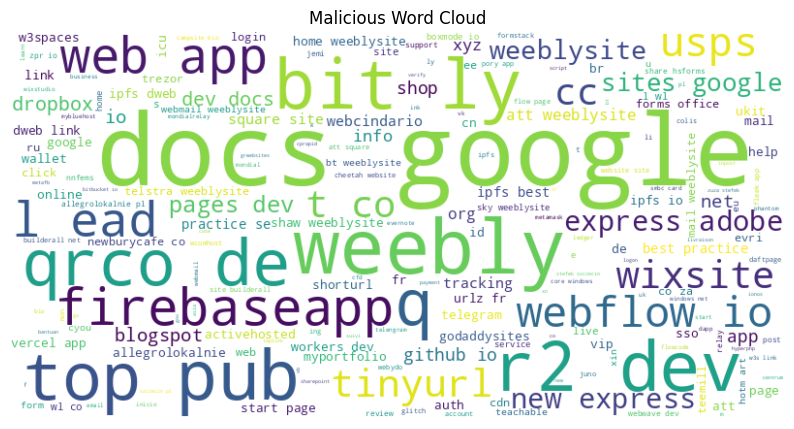

In [ ]:
# Word Cloud malicious
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(malicious['domain']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Malicious Word Cloud')
plt.show()

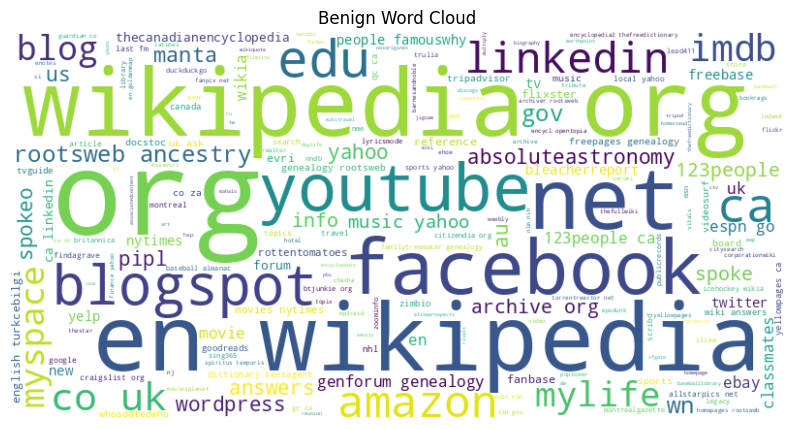

In [ ]:
# Word Cloud benign
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(benign['domain']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Benign Word Cloud')
plt.show()

# Plotting the presence of hyphen symbol

There are very few difference between the two classes

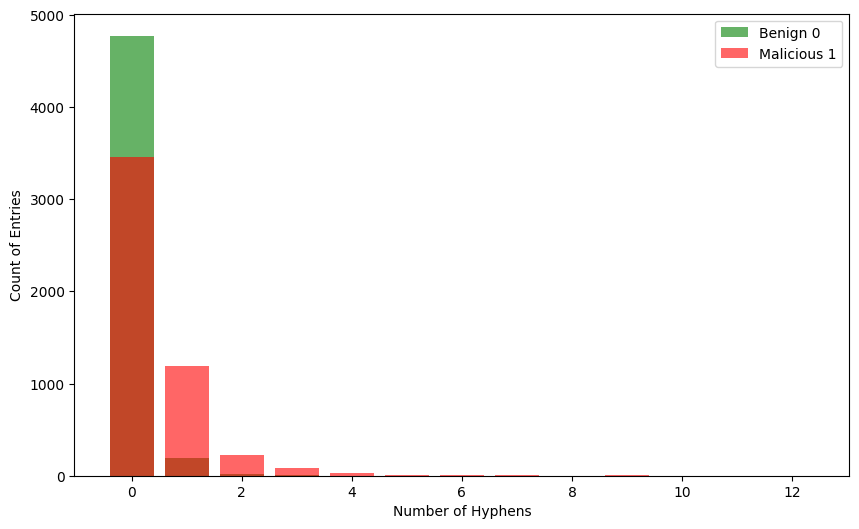

In [ ]:
# Plotting in wich class is distributed the hyphen symbol

# Creazione di una copia del DataFrame per analizzare le entry
support_df = urldata.copy()

# Calcolare il conteggio degli hyphen per ciascuna entry
support_df['hyphen_count'] = support_df['domain'].apply(lambda domain: domain.count('-'))

# Creazione dei dati per il conteggio degli hyphen separato per label
hyphen_counts_label_0 = support_df[support_df['label'] == 0]['hyphen_count'].value_counts().sort_index()
hyphen_counts_label_1 = support_df[support_df['label'] == 1]['hyphen_count'].value_counts().sort_index()

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))

# Grafico per label 0 (verde)
plt.bar(hyphen_counts_label_0.index, hyphen_counts_label_0.values, color='green', label='Benign 0', alpha=0.6)

# Grafico per label 1 (rosso)
plt.bar(hyphen_counts_label_1.index, hyphen_counts_label_1.values, color='red', label='Malicious 1', alpha=0.6)

# Etichette degli assi
plt.xlabel('Number of Hyphens')
plt.ylabel('Count of Entries')

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()


### Counting of Special Characters

# Plotting the presence of underscore symbol

There are very few difference between the two classes

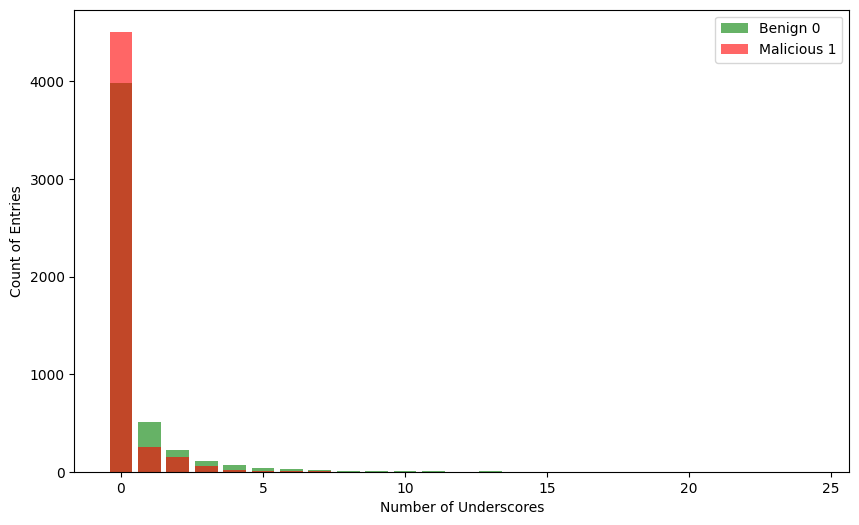

In [ ]:
# Plotting in wich class is distributed the underscore symbol
import matplotlib.pyplot as plt

# Create a copy of the DataFrame for analysis
support_df = urldata.copy()

# Calculate the count of underscores for each entry
support_df['underscore_count'] = support_df['url'].apply(lambda url: url.count('_'))

# Create the data for underscore count separated by label
underscore_counts_label_0 = support_df[support_df['label'] == 0]['underscore_count'].value_counts().sort_index()
underscore_counts_label_1 = support_df[support_df['label'] == 1]['underscore_count'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))

# Bar plot for label 0 (green)
plt.bar(underscore_counts_label_0.index, underscore_counts_label_0.values, color='green', label='Benign 0', alpha=0.6)

# Bar plot for label 1 (red)
plt.bar(underscore_counts_label_1.index, underscore_counts_label_1.values, color='red', label='Malicious 1', alpha=0.6)

# Set axis labels
plt.xlabel('Number of Underscores')
plt.ylabel('Count of Entries')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Plotting the presence of @ symbol

As we can see, the presence of the @ symbol within URLs is almost exclusively associated with malicious URLs. Therefore, even if there are a low number of samples that have the @ this feature could be decisive for the classification.

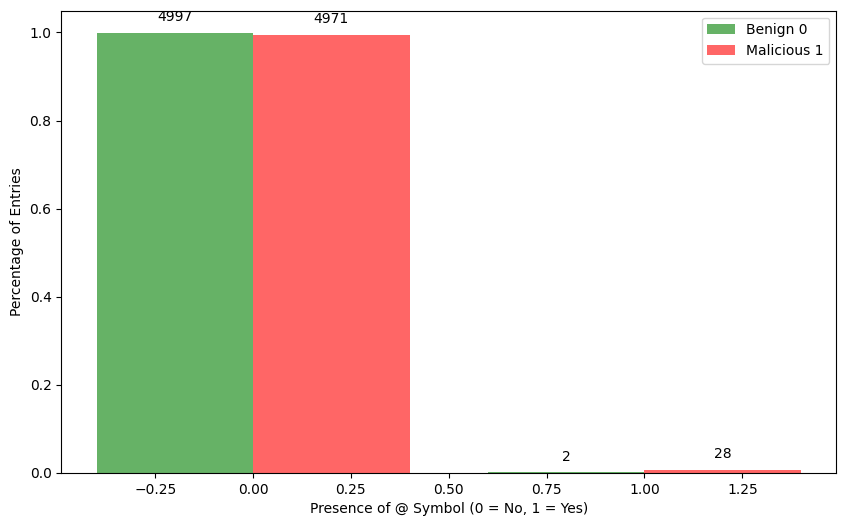

In [ ]:
# Plotting in wich class is distributed the @ symbol

support_df = urldata.copy()

# Calcolare se l'entry contiene o meno il simbolo '@' (1 per presente, 0 per assente)
support_df['ats_presence'] = support_df['ats_count'].apply(lambda x: 1 if x > 0 else 0)

# Calcolare la percentuale di occorrenze con '@' per ciascuna classe
ats_presence_label_0 = support_df[support_df['label'] == 0]['ats_presence'].value_counts(normalize=True).sort_index()
ats_presence_label_1 = support_df[support_df['label'] == 1]['ats_presence'].value_counts(normalize=True).sort_index()

# Creazione del grafico a barre cumulative
plt.figure(figsize=(10, 6))

# Barra per label 0 (verde)
bars_label_0 = plt.bar(ats_presence_label_0.index - 0.2, ats_presence_label_0.values, color='green', width=0.4, label='Benign 0', alpha=0.6)

# Barra per label 1 (rosso)
bars_label_1 = plt.bar(ats_presence_label_1.index + 0.2, ats_presence_label_1.values, color='red', width=0.4, label='Malicious 1', alpha=0.6)

# Etichette degli assi
plt.xlabel('Presence of @ Symbol (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Entries')

# Aggiungi la legenda
plt.legend()

# Aggiungi il numero di entry sopra ogni barra per entrambe le etichette
for bar in bars_label_0:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{int(yval * len(support_df[support_df["label"] == 0]))}',
             ha='center', va='bottom', fontsize=10)

for bar in bars_label_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{int(yval * len(support_df[support_df["label"] == 1]))}',
             ha='center', va='bottom', fontsize=10)

# Mostra il grafico
plt.show()


# Plotting the presence of numbers

As we can see, the presence of numbers within URLs is almost exclusively associated with malicious URLs. Therefore, this suggests that it could be an important feature for classification.

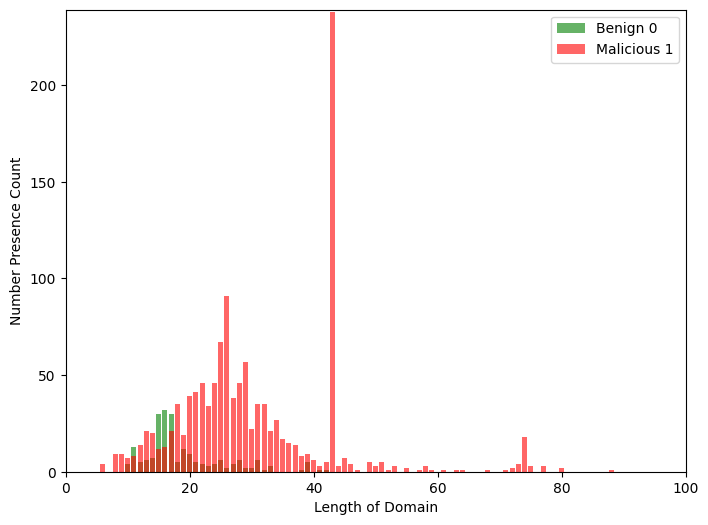

                                                    url  \
0            https://www.en.wikipedia.org/wiki/EA_Games   
1     https://www.tunein.com/radio/Plan%c3%a8te-Jazz...   
2     https://www.ilike.com/artist/Jean-Pierre+Ferla...   
3     https://www.dbpedia.org/resource/2007%E2%80%93...   
4            https://www.linkedin.com/in/timothymhaynes   
...                                                 ...   
9995                     https://mail-cytanet.pages.dev   
9996                           https://giftredeme.info/   
9997                           http://tgweb.revision.uz   
9998                   https://ethereum-org.dex-dd.com/   
9999  https://bafkreied7pp6e5x2myujigverxvcdsq4ts7xf...   

                                                 domain       cctld  length  \
0                                  www.en.wikipedia.org      Global      42   
1                                        www.tunein.com      Global      58   
2                                         www.ilike.co

In [ ]:
# Plotting in wich class is distributed the presence of numbers

# Creazione di una copia del DataFrame per calcolare 'domain_length' e 'number_presence'
support_df = urldata.copy()
support_df['domain_length'] = support_df['domain'].apply(len)
support_df['number_presence'] = support_df['domain'].apply(lambda s: 1 if any(char.isdigit() for char in s) else 0)

# Creazione del grafico a barre
plt.figure(figsize=(8, 6))

# Dati per le classi 0 e 1
class_0_data = support_df[support_df['label'] == 0]
class_1_data = support_df[support_df['label'] == 1]

# Conteggio delle occorrenze di 'domain_length' e 'number_presence' per ciascuna classe
class_0_counts = class_0_data.groupby('domain_length')['number_presence'].sum()
class_1_counts = class_1_data.groupby('domain_length')['number_presence'].sum()

# Creazione delle barre
plt.bar(class_0_counts.index, class_0_counts.values, color='green', label='Benign 0', alpha=0.6)
plt.bar(class_1_counts.index, class_1_counts.values, color='red', label='Malicious 1', alpha=0.6)

# Etichette degli assi
plt.xlabel('Length of Domain')
plt.ylabel('Number Presence Count')

# Impostazioni degli assi
plt.xlim(0, 100)  # Impostazione dei limiti per l'asse x
plt.ylim(0, max(class_0_counts.max(), class_1_counts.max()) + 1)  # Impostazione dei limiti per l'asse y

# Aggiungi la legenda
plt.legend()

# Mostra il grafico
plt.show()

# Mostra il DataFrame di supporto con le nuove colonne
print(support_df)

### Geographical View on CCTLDs

In [ ]:
import folium
from geopy.geocoders import Photon
from IPython.display import display

In [ ]:
# Have a brief view on cctld's
count_cctld = urldata.cctld.value_counts()
print(count_cctld)

cctld
Global                            8109
Libya                              242
British Indian Ocean Territory     236
Montenegro                         214
Germany                            211
                                  ... 
Togo                                 1
Finland                              1
Singapore                            1
Ascension Island                     1
Norway                               1
Name: count, Length: 79, dtype: int64


In [ ]:
global_map = folium.Map(location=[0, 0], zoom_start=2)
geolocator = Photon(user_agent="malicious_url_detection")

# Add markers
for country, cases in count_cctld.items():
    try:
        location = geolocator.geocode(country)
        if location:
            folium.Marker(
                location=[location.latitude, location.longitude],
                popup=f"{country}: {cases} cases",
            ).add_to(global_map)
    except:
        continue
display(global_map)

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Count the cctld's
cctld_counts = urldata['cctld'].value_counts()

# Filter Global
if 'Global' not in cctld_counts.index:
    cctld_counts['Global'] = 0

# Create new dataframe
data = pd.DataFrame({'region': cctld_counts.index, 'count': cctld_counts.values})

# Colorscale Yellow-Orange-Red
colorscale = 'YlOrRd'

# Create a geographical heat map
fig = go.Figure(data=go.Choropleth(
    locations=data['region'],
    z=data['count'],
    locationmode='country names',
    colorscale=colorscale,
    autocolorscale=True,
    marker_line_color='white',
    colorbar_title='Count',
    zmin = 0,
    zmax = 150
))

# Update
fig.update_layout(title_text='Distribution of Country-Code Top Level Domains')

# Show
fig.show()

### Use of the HTTPS Protocol
Just the 3% of the total samples uses http.

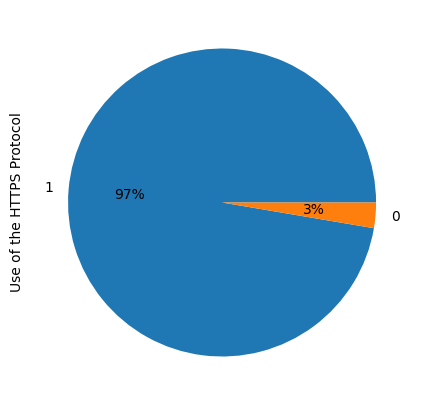

In [ ]:
#Plot using cake plot the ip bare feature
plt.figure(figsize=(5, 5))
urldata.have_https.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('Use of the HTTPS Protocol');

#Plotting the distribution of https between the classes

As we can see all the presence of "http" are related to the malicious URLs.

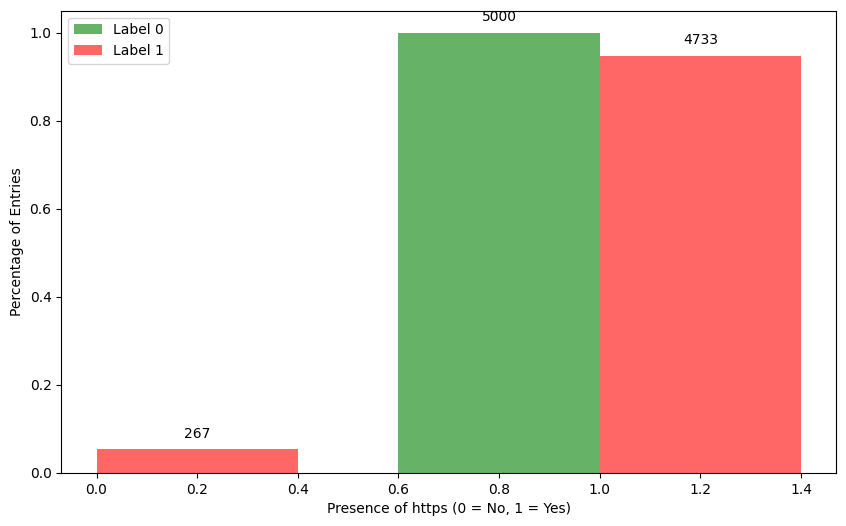

In [ ]:
# Plotting that all of the URLs thant don't use https are all malicious URLs
# Creazione di una copia del DataFrame per analizzare le entry
support_df = urldata.copy()

# Calcolare la presenza di https (1 per presente, 0 per assente)
support_df['https_presence'] = support_df['have_https'].apply(lambda x: 1 if x else 0)

# Calcolare la percentuale di occorrenze con 'https' per ciascuna classe
https_presence_label_0 = support_df[support_df['label'] == 0]['https_presence'].value_counts(normalize=True).sort_index()
https_presence_label_1 = support_df[support_df['label'] == 1]['https_presence'].value_counts(normalize=True).sort_index()

# Creazione del grafico a barre cumulative
plt.figure(figsize=(10, 6))

# Barra per label 0 (verde)
bars_label_0 = plt.bar(https_presence_label_0.index - 0.2, https_presence_label_0.values, color='green', width=0.4, label='Label 0', alpha=0.6)

# Barra per label 1 (rosso)
bars_label_1 = plt.bar(https_presence_label_1.index + 0.2, https_presence_label_1.values, color='red', width=0.4, label='Label 1', alpha=0.6)

# Etichette degli assi
plt.xlabel('Presence of https (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Entries')

# Aggiungi la legenda
plt.legend()

# Aggiungi il numero di entry sopra ogni barra per entrambe le etichette
for bar in bars_label_0:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{int(yval * len(support_df[support_df["label"] == 0]))}',
             ha='center', va='bottom', fontsize=10)

for bar in bars_label_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{int(yval * len(support_df[support_df["label"] == 1]))}',
             ha='center', va='bottom', fontsize=10)

# Mostra il grafico
plt.show()


## Normalization Process

Before proceeding with the 'Data Processing' steps, it is important to consider the specific values of the data we’ve collected so far. The choice of measurement units can have a significant impact on data analysis.

- For example, converting measurement units from meters to inches for height, or from kilograms to pounds for weight, could result in very different outcomes.

- Generally, when an attribute is expressed in smaller units, it leads to a larger range for that attribute, which in turn can make that attribute appear to have a greater effect or "weight." To avoid relying on the choice of measurement units, the data should be normalized or standardized. This process involves transforming the data so that it falls within a smaller or common range.

The technique used so far is **"z-score normalization"** (also known as zero-mean normalization), where the values of an attribute 'A' are normalized based on the *mean* (i.e., average) and *standard deviation* of 'A'. This method was chosen because it is particularly effective when the actual minimum and maximum values for attribute 'A' are unknown, or when there are outliers that would dominate min-max normalization.

- We can observe that for many of the features I’ve extracted (such as the length of a URL or the count of a certain character), the actual minimums and maximums are either unknown or undefined.


In [ ]:
#Convert the categorical cctld data into numerical data [0,1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
urldata['cctld'] = le.fit_transform(urldata['cctld'])

#Same work for the bigger dataset
bigle = LabelEncoder()
bigurldata['cctld'] = bigle.fit_transform(bigurldata['cctld'])

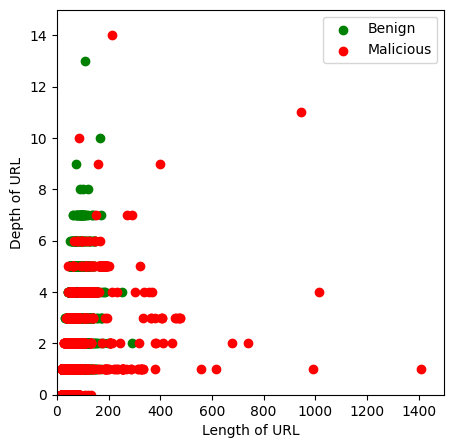

In [ ]:
# Scatter plot before normalization
plt.figure(figsize=(5, 5))

colors = {0: 'green', 1: 'red'}

for label, color in colors.items():
    plt.scatter(urldata.length[urldata.label == label],
                urldata.depth[urldata.label == label],
                c=color, label='Benign' if label == 0 else 'Malicious')

plt.xlabel('Length of URL')
plt.ylabel('Depth of URL')
plt.xlim(0, 1500)
plt.ylim(0, 15)
plt.legend()


In [ ]:
urldata

,url,domain,cctld,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
0,https://www.en.wikipedia.org/wiki/EA_Games,www.en.wikipedia.org,25,42,1,0,0,0,1,2,0,0
1,https://www.tunein.com/radio/Plan%c3%a8te-Jazz...,www.tunein.com,25,58,1,0,0,0,0,2,0,0
2,https://www.ilike.com/artist/Jean-Pierre+Ferla...,www.ilike.com,25,75,1,0,0,0,0,4,0,0
3,https://www.dbpedia.org/resource/2007%E2%80%93...,www.dbpedia.org,25,91,1,0,0,0,5,2,0,0
4,https://www.linkedin.com/in/timothymhaynes,www.linkedin.com,25,42,1,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://mail-cytanet.pages.dev,mail-cytanet.pages.dev,25,30,1,0,1,0,0,0,0,1
9996,https://giftredeme.info/,giftredeme.info,25,24,1,0,0,0,0,0,0,1
9997,http://tgweb.revision.uz,tgweb.revision.uz,76,24,0,0,0,0,0,0,0,1
9998,https://ethereum-org.dex-dd.com/,ethereum-org.dex-dd.com,25,32,1,0,1,0,0,0,0,1


In [ ]:
from scipy.stats import zscore

In [ ]:
# Calculate the zscores and drop zscores into new column
for feature in ['cctld', 'length', 'ats_count', 'underscore_count', 'depth']:
    urldata[feature] = zscore(urldata[feature])
    #feature_names = ['url', 'domain', 'cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth', 'label']

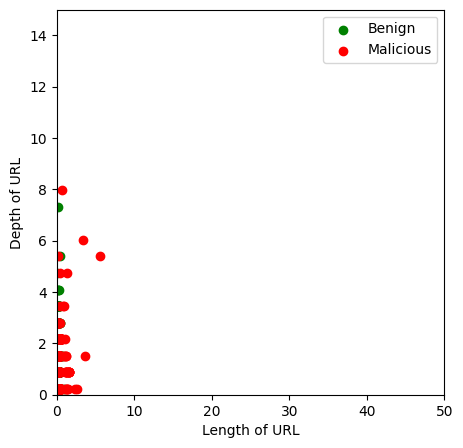

In [ ]:
# Scatter plot before normalization
plt.figure(figsize=(5, 5))

colors = {0: 'green', 1: 'red'}

for label, color in colors.items():
    plt.scatter(urldata.length[urldata.label == label],
                urldata.depth[urldata.label == label],
                c=color, label='Benign' if label == 0 else 'Malicious')

plt.xlabel('Length of URL')
plt.ylabel('Depth of URL')
plt.xlim(0, 50)
plt.ylim(0, 15)
plt.legend()


In [ ]:
urldata

,url,domain,cctld,length,have_https,have_ip,has_hyphen,ats_count,underscore_count,depth,has_number,label
0,https://www.en.wikipedia.org/wiki/EA_Games,www.en.wikipedia.org,-0.151909,-0.069761,1,0,0,-0.054743,0.599432,0.236011,0,0
1,https://www.tunein.com/radio/Plan%c3%a8te-Jazz...,www.tunein.com,-0.151909,-0.008084,1,0,0,-0.054743,-0.295376,0.236011,0,0
2,https://www.ilike.com/artist/Jean-Pierre+Ferla...,www.ilike.com,-0.151909,0.057449,1,0,0,-0.054743,-0.295376,1.523575,0,0
3,https://www.dbpedia.org/resource/2007%E2%80%93...,www.dbpedia.org,-0.151909,0.119126,1,0,0,-0.054743,4.178668,0.236011,0,0
4,https://www.linkedin.com/in/timothymhaynes,www.linkedin.com,-0.151909,-0.069761,1,0,0,-0.054743,-0.295376,0.236011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://mail-cytanet.pages.dev,mail-cytanet.pages.dev,-0.151909,-0.116019,1,0,1,-0.054743,-0.295376,-1.051554,0,1
9996,https://giftredeme.info/,giftredeme.info,-0.151909,-0.139148,1,0,0,-0.054743,-0.295376,-1.051554,0,1
9997,http://tgweb.revision.uz,tgweb.revision.uz,4.734461,-0.139148,0,0,0,-0.054743,-0.295376,-1.051554,0,1
9998,https://ethereum-org.dex-dd.com/,ethereum-org.dex-dd.com,-0.151909,-0.108309,1,0,1,-0.054743,-0.295376,-1.051554,0,1


## Feature Selection

Data reduction techniques are used to obtain a *compressed representation* of the dataset that is significantly smaller in size, yet still closely preserves the integrity of the original data. In other words, applying mining techniques to the reduced dataset should be more efficient, while still yielding the same (or nearly the same) analytical results.

Some common data reduction strategies include **dimensionality reduction**, numerosity reduction, and data compression. In our case, we will apply dimensionality reduction techniques through a feature selection process.

- Specifically, the idea was to group features that are semantically related. In this context, we focus on features related to special characters, and then evaluate whether the analytical results generated from these grouped features are similar.

- I decided to not include the feature related to the presence of numbers in the list, because, as previously mentioned, the presence of numbers within URLs is a characteristic mainly associated with malicious URLs. Given the significance of this feature, I believe that combining it with the other features would diminish its importance.


In [ ]:
# Features that deal with special characters
special_chars_feats = ['has_hyphen', 'ats_count', 'underscore_count', 'depth']
# Drop special chars features + label (for maintaining ordering)
urldata_fs = urldata.drop(special_chars_feats, axis=1)
urldata_fs = urldata_fs.drop('label', axis=1)

In [ ]:
# Returns the count of special chars
def special_chars_count(url):
    return url.count('-')+url.count('@')+url.count('_')+url.count('/')

In [ ]:
# Add count of special chars + label (ordered)
urldata_fs['special_chars'] = urldata_fs['url'].apply(special_chars_count)
urldata_fs['label'] = urldata['label']

In [ ]:
# Overview before normalization
urldata_fs

,url,domain,cctld,length,have_https,have_ip,has_number,special_chars,label
0,https://www.en.wikipedia.org/wiki/EA_Games,www.en.wikipedia.org,-0.151909,-0.069761,1,0,0,5,0
1,https://www.tunein.com/radio/Plan%c3%a8te-Jazz...,www.tunein.com,-0.151909,-0.008084,1,0,0,8,0
2,https://www.ilike.com/artist/Jean-Pierre+Ferla...,www.ilike.com,-0.151909,0.057449,1,0,0,7,0
3,https://www.dbpedia.org/resource/2007%E2%80%93...,www.dbpedia.org,-0.151909,0.119126,1,0,0,9,0
4,https://www.linkedin.com/in/timothymhaynes,www.linkedin.com,-0.151909,-0.069761,1,0,0,4,0
...,...,...,...,...,...,...,...,...,...
9995,https://mail-cytanet.pages.dev,mail-cytanet.pages.dev,-0.151909,-0.116019,1,0,0,3,1
9996,https://giftredeme.info/,giftredeme.info,-0.151909,-0.139148,1,0,0,3,1
9997,http://tgweb.revision.uz,tgweb.revision.uz,4.734461,-0.139148,0,0,0,2,1
9998,https://ethereum-org.dex-dd.com/,ethereum-org.dex-dd.com,-0.151909,-0.108309,1,0,0,5,1


In [ ]:
# Normalizing
for feature in ['cctld', 'length', 'special_chars']:
    urldata_fs[feature] = zscore(urldata_fs[feature])

In [ ]:
# Overview after normalization
urldata_fs

,url,domain,cctld,length,have_https,have_ip,has_number,special_chars,label
0,https://www.en.wikipedia.org/wiki/EA_Games,www.en.wikipedia.org,-0.151909,-0.069761,1,0,0,-0.131083,0
1,https://www.tunein.com/radio/Plan%c3%a8te-Jazz...,www.tunein.com,-0.151909,-0.008084,1,0,0,0.787080,0
2,https://www.ilike.com/artist/Jean-Pierre+Ferla...,www.ilike.com,-0.151909,0.057449,1,0,0,0.481026,0
3,https://www.dbpedia.org/resource/2007%E2%80%93...,www.dbpedia.org,-0.151909,0.119126,1,0,0,1.093134,0
4,https://www.linkedin.com/in/timothymhaynes,www.linkedin.com,-0.151909,-0.069761,1,0,0,-0.437137,0
...,...,...,...,...,...,...,...,...,...
9995,https://mail-cytanet.pages.dev,mail-cytanet.pages.dev,-0.151909,-0.116019,1,0,0,-0.743192,1
9996,https://giftredeme.info/,giftredeme.info,-0.151909,-0.139148,1,0,0,-0.743192,1
9997,http://tgweb.revision.uz,tgweb.revision.uz,4.734461,-0.139148,0,0,0,-1.049246,1
9998,https://ethereum-org.dex-dd.com/,ethereum-org.dex-dd.com,-0.151909,-0.108309,1,0,0,-0.131083,1


# Data Mining

Data mining plays a crucial role in Machine Learning (ML) by focusing on uncovering valuable patterns, insights, and knowledge from large datasets. It involves applying various techniques to extract meaningful information and identify hidden patterns within the data. To achieve this, I leveraged several models encountered in our studies, with the most well-known ones based on recent literature:

- **Linear SVC** (Linear Support Vector Classifier): A type of Support Vector Machine (SVM) used for both binary and multi-class classification. It aims to find the optimal hyperplane that best separates data points belonging to different classes in a high-dimensional space.

- **MLPClassifier** (Multilayer Perceptron Classifier): A feed-forward neural network model used for classification tasks. It consists of multiple layers: an input layer, one or more hidden layers, and an output layer. The network learns to classify data by processing inputs through layers of neurons, each performing weighted calculations, with non-linear activation functions applied. The MLPClassifier is a versatile and powerful model, capable of capturing complex patterns in data that simpler algorithms might miss. It is particularly effective in scenarios where the relationships between features are non-linear.

- **Decision Tree Classifier**: A supervised machine learning algorithm used for classification tasks. It works by splitting the data into subsets based on the values of input features. These splits create a tree-like structure, where each internal node represents a feature, each branch represents a decision, and each leaf node corresponds to a class label. The algorithm makes decisions by following a path from the root to a leaf node based on feature values.

- **Random Forest Classifier**: An ensemble learning method that combines multiple Decision Trees to improve prediction accuracy. It works by generating a collection of Decision Trees during training and then aggregating their predictions to make a final decision. This ensemble approach helps reduce overfitting and improves the model's overall performance.

- **Gaussian Naive Bayes**: A probabilistic classifier based on the Naive Bayes theorem. It assumes that features are statistically independent within each class and models the distribution of each feature using a Gaussian distribution. This classifier is particularly useful for continuous data and is commonly used in text classification and spam filtering.


Each of the models listed above has its own advantages and disadvantages, which can be explored further through available literature and research papers on the subject. However, the main goal is to focus on the results provided by the metrics obtained, and provide justification for the overall performance. Specifically, the metrics I have chosen to guide my work are:

- **F1-Score**: A combined measure using precision and recall, i.e., F = (2 • precision • recall) / (precision + recall).

- **Accuracy**: The percentage of test set tuples correctly classified by the classifier, i.e., accuracy = (TP + TN) / (P + N).

- **Precision**: A measure of exactness (i.e., what percentage of tuples labeled as positive are actually positive), i.e., precision = TP / (TP + FP).

- **Recall**: A measure of completeness (i.e., what percentage of positive tuples are correctly labeled), i.e., recall = TP / (TP + FN) = TP / P.


It’s important to note that, in the presence of the class imbalance problem we’ve discussed earlier—where the main class of interest (malicious URLs) is rare—the last three metrics are crucial. They provide a better reflection of the model's quality than accuracy alone. I would like to reiterate that the class imbalance issue has been properly addressed, and thus, accuracy alone is sufficient for evaluating our model's performance.


## Holdout Method

The **Holdout Method** is a widely used technique in Machine Learning for training a model and evaluating its accuracy, often guiding the subsequent step of model selection, where one classifier may be chosen over another. In this approach, the data are randomly divided into two separate sets: a training set and a test set. Typically, two-thirds of the data are assigned to the training set, and the remaining one-third is reserved for the test set.

- **Training Set**: The training set is used during the model's training phase to improve its performance. An optimization procedure is applied here to find the parameter configuration that minimizes the training error. This set essentially functions as the "playground" where the model learns from the provided data.

- **Test Set**: The test set is kept aside for evaluating the real-world performance and generalization ability of the model. It provides an unbiased measure of how well the model can predict outcomes on unseen data. By assessing the model with the test set, we can determine its ability to perform effectively on new, previously unseen data.

The **holdout method** plays a key role in evaluating a model’s performance, ensuring that it can make accurate predictions on new data. It helps identify issues like **overfitting** (where the model performs exceptionally well on training data but fails on new data) and offers a more realistic estimate of the model's effectiveness in real-world scenarios.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

#SKF validation move import in the correct place
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_validate

In [ ]:
# Remove categorical features from both urldata and urldata_fs
urldata = urldata.drop(['domain', 'url'], axis=1)
urldata_fs = urldata_fs.drop(['domain', 'url'], axis=1)

In [ ]:
# Separating data and ground truth
X = urldata.drop(['label'],axis=1)
Y = urldata['label']

In [ ]:
# Instantiating training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2)

#############################################
######-Model => ('DecisionTreeClassifier', DecisionTreeClassifier()) 
Test Accuracy :  86.80%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1000
           1       0.89      0.84      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

             Confusion_matrix 


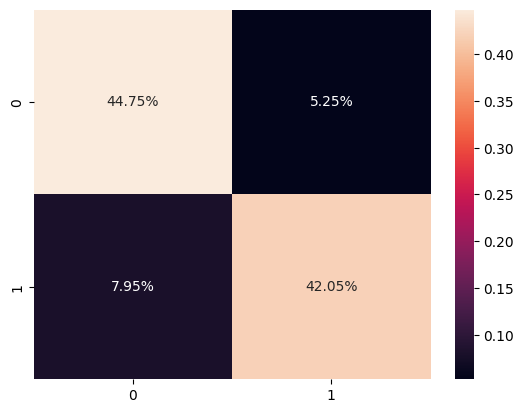

###################- End -###################
#############################################
######-Model => ('RandomForestClassifier', RandomForestClassifier()) 
Test Accuracy :  87.75%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.90      0.85      0.87      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

             Confusion_matrix 


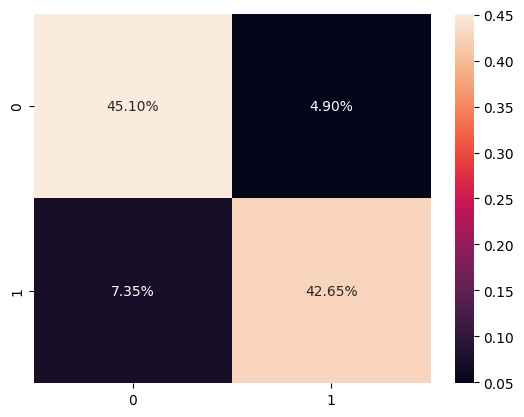

###################- End -###################
#############################################
######-Model => ('MLPClassifier', MLPClassifier(max_iter=1000, random_state=42)) 
Test Accuracy :  84.15%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.86      0.82      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

             Confusion_matrix 


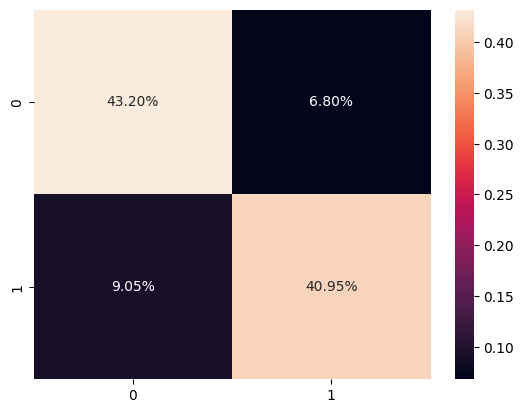

###################- End -###################
#############################################
######-Model => ('LinearSVC', LinearSVC(dual=False, max_iter=10000)) 
Test Accuracy :  66.60%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.62      0.85      0.72      1000
           1       0.77      0.48      0.59      1000

    accuracy                           0.67      2000
   macro avg       0.69      0.67      0.65      2000
weighted avg       0.69      0.67      0.65      2000

             Confusion_matrix 


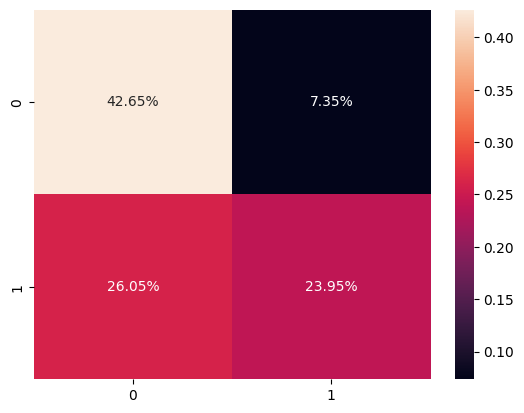

###################- End -###################
#############################################
######-Model => ('GaussianNB', GaussianNB()) 
Test Accuracy :  53.45%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1000
           1       0.99      0.07      0.13      1000

    accuracy                           0.53      2000
   macro avg       0.75      0.53      0.41      2000
weighted avg       0.75      0.53      0.41      2000

             Confusion_matrix 


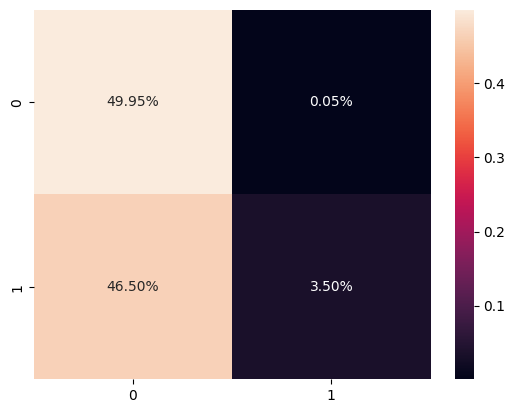

###################- End -###################


In [ ]:
# Instantiating Models aggiustato il mlpc

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
gnb = GaussianNB()
svc = LinearSVC(dual=False, max_iter=10000)

models = [("DecisionTreeClassifier",dt),("RandomForestClassifier",rf),
          ("MLPClassifier",mlp),("LinearSVC",svc),("GaussianNB",gnb)]

# Holdout

accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m[1]
    model_.fit(X_train, Y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, Y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(Y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(Y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

### Training with feature selection dataset

Using the dataset obtained from the **feature selection** step, I perform the same procedure of **training**. I decided to follow this approach in order to test different strategies and determine which one best fits the problem.


In [ ]:
# Separating data and ground truth
Xfs = urldata_fs.drop(['label'],axis=1)
Yfs = urldata_fs['label']
Xfs

,cctld,length,have_https,have_ip,has_number,special_chars
0,-0.151909,-0.069761,1,0,0,-0.131083
1,-0.151909,-0.008084,1,0,0,0.787080
2,-0.151909,0.057449,1,0,0,0.481026
3,-0.151909,0.119126,1,0,0,1.093134
4,-0.151909,-0.069761,1,0,0,-0.437137
...,...,...,...,...,...,...
9995,-0.151909,-0.116019,1,0,0,-0.743192
9996,-0.151909,-0.139148,1,0,0,-0.743192
9997,4.734461,-0.139148,0,0,0,-1.049246
9998,-0.151909,-0.108309,1,0,0,-0.131083


In [ ]:
# Instantiating training and test set
Xfs_train, Xfs_test, Yfs_train, Yfs_test = train_test_split(Xfs, Yfs, test_size=0.2, shuffle=True, random_state=2)

#############################################
######-Model => ('DecisionTreeClassifier', DecisionTreeClassifier()) 
Test Accuracy :  85.30%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1000
           1       0.90      0.79      0.84      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000

             Confusion_matrix 


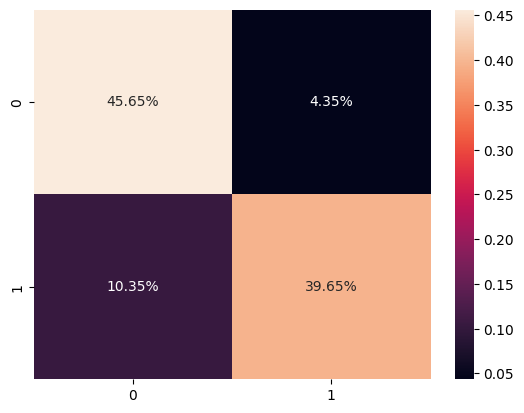

###################- End -###################
#############################################
######-Model => ('RandomForestClassifier', RandomForestClassifier()) 
Test Accuracy :  84.70%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.88      0.81      0.84      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

             Confusion_matrix 


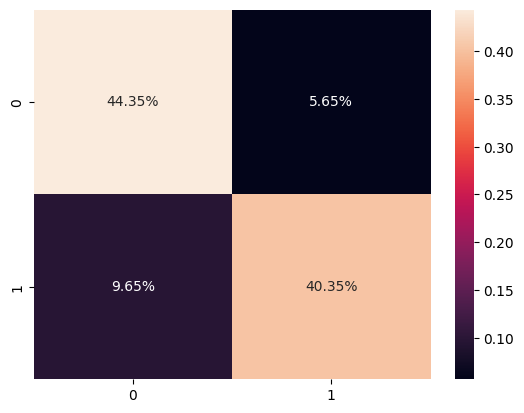

###################- End -###################
#############################################
######-Model => ('MLPClassifier', MLPClassifier(max_iter=1000, random_state=42)) 
Test Accuracy :  81.55%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.84      0.78      0.81      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

             Confusion_matrix 


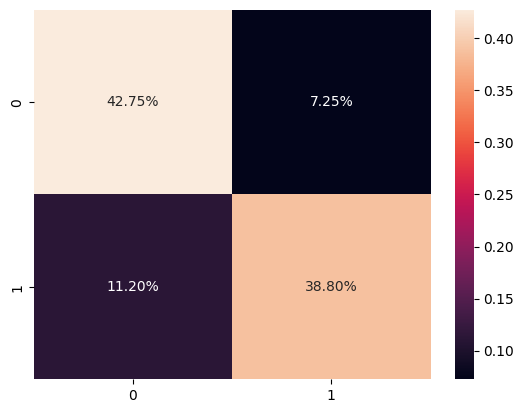

###################- End -###################
#############################################
######-Model => ('LinearSVC', LinearSVC(dual=False, max_iter=10000)) 
Test Accuracy :  67.55%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1000
           1       0.72      0.58      0.64      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.67      2000
weighted avg       0.68      0.68      0.67      2000

             Confusion_matrix 


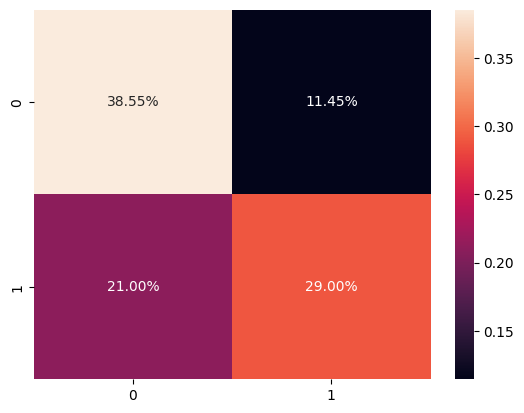

###################- End -###################
#############################################
######-Model => ('GaussianNB', GaussianNB()) 
Test Accuracy :  53.25%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1000
           1       0.99      0.07      0.12      1000

    accuracy                           0.53      2000
   macro avg       0.75      0.53      0.40      2000
weighted avg       0.75      0.53      0.40      2000

             Confusion_matrix 


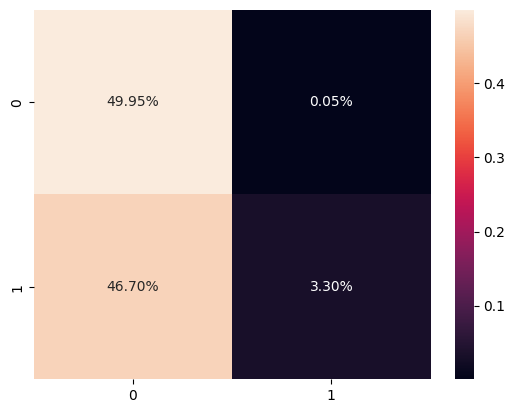

###################- End -###################


In [ ]:
# Instantiating Models

dt_fs = DecisionTreeClassifier()
rf_fs = RandomForestClassifier()
mlp_fs = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
gnb_fs = GaussianNB()
svc_fs = LinearSVC(dual=False, max_iter=10000)

models_fs = [("DecisionTreeClassifier",dt_fs),("RandomForestClassifier",rf_fs),
          ("MLPClassifier",mlp_fs),("LinearSVC",svc_fs),("GaussianNB",gnb_fs)]

# Holdout

accuracy_test_fs=[]
for m in models_fs:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m[1]
    model_.fit(Xfs_train, Yfs_train)
    pred = model_.predict(Xfs_test)
    acc = accuracy_score(pred, Yfs_test)
    accuracy_test_fs.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(Yfs_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(Yfs_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

## Stratified K-Fold

In **k-fold cross-validation**, the initial data are randomly partitioned into **k** mutually exclusive subsets or “folds”, **D1, D2,..., Dk**, each of approximately equal size. **Training** and **testing** is performed **k** times. In iteration **i**, partition **Di** is reserved as the test set, and the remaining partitions are collectively used to train the model. That is, in the first iteration, subsets **D2,..., Dk** collectively serve as the training set to obtain a first model, which is tested on **D1**; the second iteration is trained on subsets **D1, D3,..., Dk** and tested on **D2**; and so on.

- As for the main design choice for this technique, that is deciding about the value of **'k'**, I agreed that **k = 10** is a satisfying preference.


In [ ]:
skfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
results_skf = []

for name, cls in models:
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    scores=cross_validate(pipe,
                         X_train,
                         Y_train,
                         scoring = {'Precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                                    'Recall': make_scorer(recall_score, average = 'weighted'),
                                    'F1-score': make_scorer(f1_score, average = 'weighted'),
                                    'Accuracy': make_scorer(accuracy_score)},
                         return_estimator = False,
                         cv = skfold,
                         n_jobs = -1)
    results_skf.append((name, scores))

In [ ]:
for r in results_skf:
    print(r[0])
    metrics = ['Accuracy','Precision', 'Recall', 'F1-score']
    for metric in metrics:
        print(f'{metric:20}', np.round(r[1]["test_"+metric].mean(),3), [np.round(elem,3) for elem in r[1]["test_"+metric]])
    print("\n")

DecisionTreeClassifier
Accuracy             0.854 [0.855, 0.858, 0.836, 0.865, 0.851, 0.849, 0.872, 0.841, 0.834, 0.878]
Precision            0.857 [0.857, 0.861, 0.843, 0.865, 0.853, 0.855, 0.874, 0.844, 0.837, 0.881]
Recall               0.854 [0.855, 0.858, 0.836, 0.865, 0.851, 0.849, 0.872, 0.841, 0.834, 0.878]
F1-score             0.854 [0.855, 0.857, 0.835, 0.865, 0.851, 0.848, 0.872, 0.841, 0.833, 0.877]


RandomForestClassifier
Accuracy             0.862 [0.862, 0.856, 0.846, 0.876, 0.86, 0.854, 0.884, 0.851, 0.848, 0.879]
Precision            0.864 [0.864, 0.86, 0.851, 0.876, 0.861, 0.857, 0.885, 0.853, 0.848, 0.882]
Recall               0.862 [0.862, 0.856, 0.846, 0.876, 0.86, 0.854, 0.884, 0.851, 0.848, 0.879]
F1-score             0.861 [0.862, 0.856, 0.846, 0.876, 0.86, 0.853, 0.884, 0.851, 0.847, 0.879]


MLPClassifier
Accuracy             0.828 [0.842, 0.849, 0.812, 0.82, 0.836, 0.811, 0.845, 0.808, 0.81, 0.842]
Precision            0.838 [0.849, 0.855, 0.826, 0.822, 0.84

# Final Report

Now I compare the two outputs from the different classifications (with and without SKF). In particular, I focus on the **accuracy**.


In [ ]:
accuracy_skf = []
for i in range(0,5):
    accuracy_skf.append(np.round(results_skf[i][1]['test_Accuracy'].mean(),3))

print(accuracy_test)

output = pd.DataFrame({"Model":["DecisionTreeClassifier","RandomForestClassifier", "MLPClassifier","LinearSVC","GaussianNB"],
                    "Accuracy":accuracy_test,"Accuracy with SKF":accuracy_skf,"Accuracy with Feature Selection":accuracy_test_fs})

[0.868, 0.8775, 0.8415, 0.666, 0.5345]


In [ ]:
output

,Model,Accuracy,Accuracy with SKF,Accuracy with Feature Selection
0,DecisionTreeClassifier,0.8680,0.854,0.8530
1,RandomForestClassifier,0.8775,0.862,0.8470
2,MLPClassifier,0.8415,0.828,0.8155
3,LinearSVC,0.6660,0.679,0.6755
4,GaussianNB,0.5345,0.534,0.5325


As we can see the metrics of the feature selection are very low compared to the other two, because of that we decided to test only the first two methods (Holdout and SKF).

## Wilcoxon Test

Using the Wilcoxon Test, I test the **null hypothesis** that **two related paired samples come from the same distribution**. Since the test compares pairs of arrays, I use the accuracy array obtained from the SKF and test each model against the others.

The ***p*-value** represents the probability of obtaining a W statistic equal to or lower than the one actually observed, assuming the null hypothesis is true.

A very small p-value suggests that such an extreme observed outcome would be highly unlikely under the null hypothesis.

In other words, given a confidence level $\alpha$ (typically 0.05), I can conclude that:

- If the ***p*-value $\leq \alpha$**, I reject the null hypothesis (with a confidence level of $\alpha$): the result is considered statistically significant.
- If the ***p*-value $> \alpha$**, I cannot reject the null hypothesis.


In [ ]:
from scipy.stats import wilcoxon

for r in results_skf:
    print("---------" + r[0] + "---------")
    current_acc_list = r[1]["test_Accuracy"]
    for to_compare in results_skf:
        if to_compare[0] != r[0]:
            print(to_compare[0])
            to_compare_acc_list = to_compare[1]["test_Accuracy"]
            stat, p = wilcoxon(current_acc_list, to_compare_acc_list)
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            if p > 0.05:
                print('Same distribution (fail to reject H0)')
            else:
                print('Different distribution (reject H0)')
            print("\n")




---------DecisionTreeClassifier---------
RandomForestClassifier
Statistics=1.500, p=0.004
Different distribution (reject H0)


MLPClassifier
Statistics=0.000, p=0.002
Different distribution (reject H0)


LinearSVC
Statistics=0.000, p=0.002
Different distribution (reject H0)


GaussianNB
Statistics=0.000, p=0.002
Different distribution (reject H0)


---------RandomForestClassifier---------
DecisionTreeClassifier
Statistics=1.500, p=0.006
Different distribution (reject H0)


MLPClassifier
Statistics=0.000, p=0.002
Different distribution (reject H0)


LinearSVC
Statistics=0.000, p=0.002
Different distribution (reject H0)


GaussianNB
Statistics=0.000, p=0.002
Different distribution (reject H0)


---------MLPClassifier---------
DecisionTreeClassifier
Statistics=0.000, p=0.002
Different distribution (reject H0)


RandomForestClassifier
Statistics=0.000, p=0.002
Different distribution (reject H0)


LinearSVC
Statistics=0.000, p=0.002
Different distribution (reject H0)


GaussianNB
Statistics

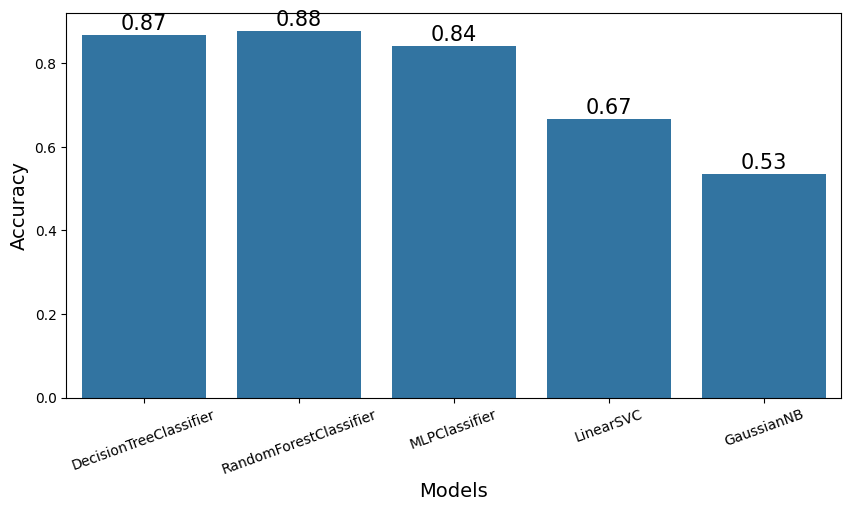

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

After the comparison we can see that the Random Forest Classifier and the decision tree performed the best in terms of accuracy, with both models achieving an accuracy of around 88%/87%. The MLPClassifier achieved good results with a 84% of accuracy but the LinearSVC models not performed so well, achieving an accuracy of around 67%. The GaussianNB model performed the worst, achieving an accuracy of around 53%. The models trained on the dataset modified through data reduction did not benefit from this change, resulting in worse performance, some possible causes could be the lose of relevant information through my solution.

It is also worth noting that also the Stratified K-Fold cross-validation method did not improve the accuracy of the models, and in fact, slightly decreased the accuracy compared to the normal classification method. This could be due to various factors such as:

- The data may not be well suited for stratification
- The Hyperparameters of the model may not be well-tuned for the SKF cross-validation
- Wrong number of folds, which could lead to overfitting underfitting


## Considerations on Decision Tree

[Text(0.45535714285714285, 0.9, 'length <= -0.083\ngini = 0.5\nsamples = 8000\nvalue = [4000, 4000]\nclass = benign'),
 Text(0.19642857142857142, 0.7, 'length <= -0.141\ngini = 0.385\nsamples = 3052\nvalue = [794, 2258]\nclass = malicious'),
 Text(0.32589285714285715, 0.8, 'True  '),
 Text(0.10714285714285714, 0.5, 'depth <= -0.73\ngini = 0.086\nsamples = 938\nvalue = [42, 896]\nclass = malicious'),
 Text(0.07142857142857142, 0.3, 'has_hyphen <= 0.5\ngini = 0.332\nsamples = 200\nvalue = [42, 158]\nclass = malicious'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 738\nvalue = [0, 738]\nclass = malicious'),
 Text(0.2857142857142857, 0.5, 'has_hyphen <= 0.5\ngini = 0.458\nsamples = 2114\nvalue = [752, 1362]\nclass = malicious'),
 Text(0.21428571428571427, 0.3, 'has_number <= 0.5\ngini = 0.497\nsamples = 1551\nvalue = [711, 840]\nclass = malicious'),
 Text(0.17857142857142858, 0.1,

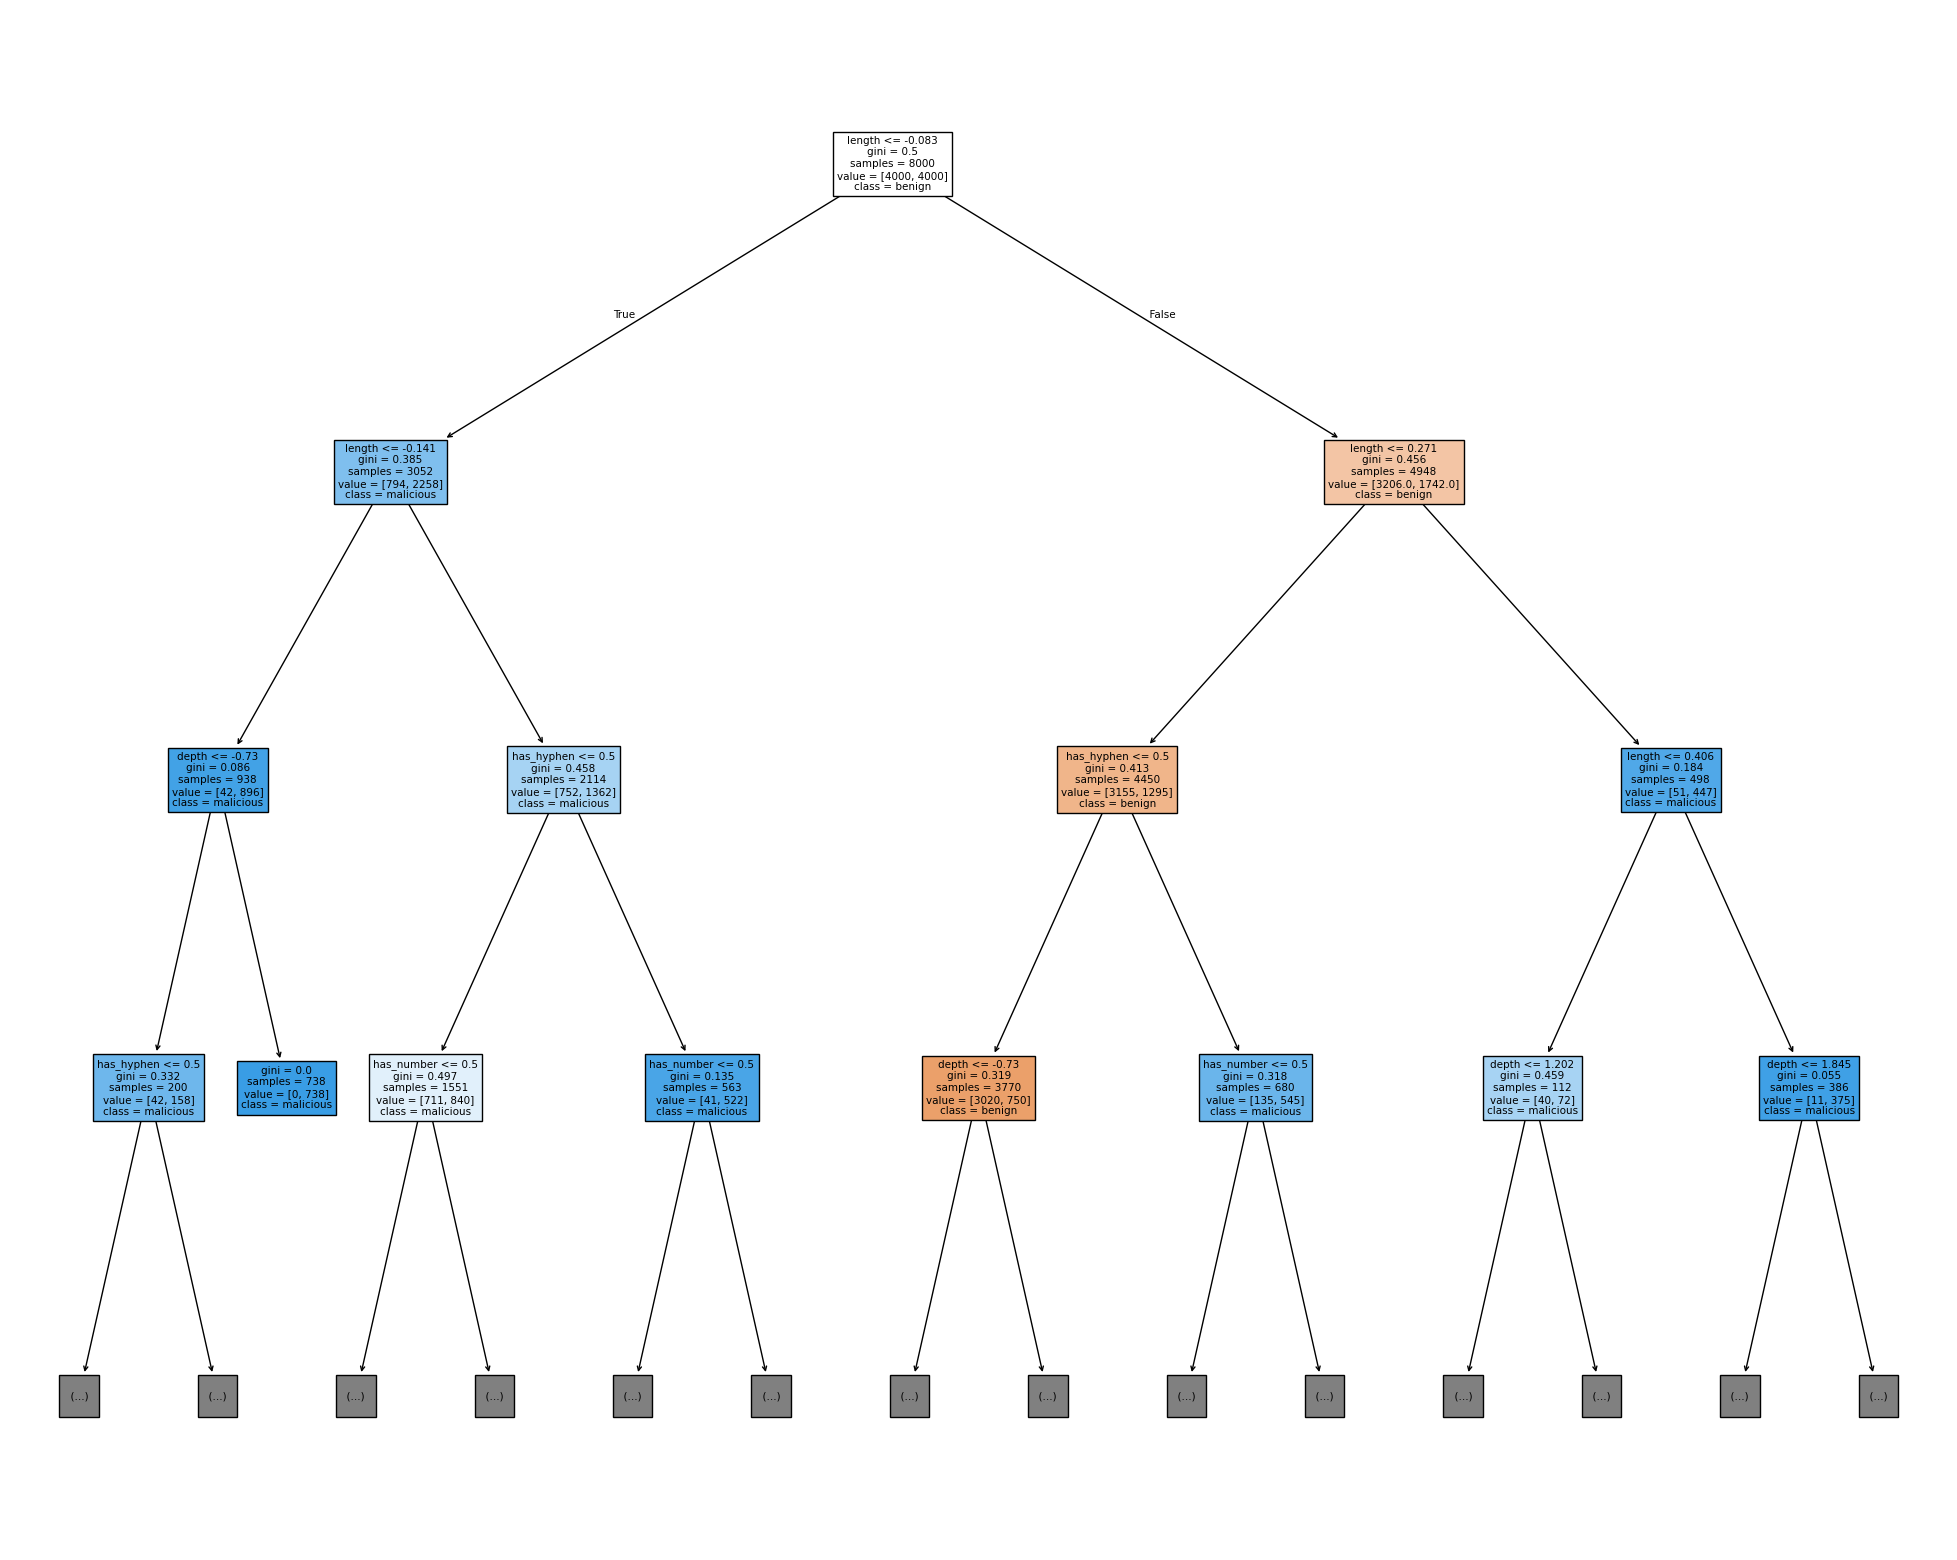

In [ ]:
from sklearn import tree
# Fix size of plot
fig = plt.figure(figsize=(25,20))
# Plot our decision tree
tree.plot_tree(dt,
               max_depth=3,
               feature_names=['cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth', 'has_number'],
               class_names=['benign', 'malicious'],
               filled=True)

### Analysis of the Decision Tree Classifier

#### Top-Level Attributes

- **Length of URL**:
  - The most significant attribute in the decision tree is the "length" of the URL, which appears as the root node. The splitting thresholds, such as `length <= 0.083` and `length <= 0.071`, demonstrate the importance of this feature in distinguishing benign URLs from malicious ones.


#### Key Intermediate Features

- **Depth of URL**:
  - The "depth" attribute, representing the number of subdirectories in the URL, is a key indicator of potential maliciousness. Nodes like `depth <= 0.574` and `depth <= 0.273` show that URLs with greater depth are more likely to be classified as malicious.
  - Malicious actors often use deeply nested structures to hide their true intentions, making this an effective discriminative feature.

- **Has Hyphen Attribute**:
  - The presence of hyphens in the domain name (`has_hyphen <= 0.5`) is another critical feature. This attribute is commonly associated with typosquatting, where attackers create URLs similar to legitimate domains by inserting hyphens (e.g., "g00gle-bank.com").
  - The tree relies on this feature at multiple points, highlighting its effectiveness in separating malicious URLs from benign ones.

- **Has Number Attribute**:
  - The "has_number" attribute, indicating whether the domain contains numbers, is used in several branches. Attackers often include numbers in domains to mimic legitimate patterns or to bypass filters (e.g., "paypa1.com"). Its inclusion reinforces its importance in detecting malicious URLs.

**Other Observed Features**:
   - Some features, such as `have_https` or `underscore_count`, don’t have a prominent role in the decision-making process. While these features might be theoretically useful, their contribution seems less significant in this model, possibly due to the way the data is distributed in the training set.

The end the decision tree heavily relies on URL length, depth, the presence of hyphens, and the inclusion of numbers. These features align with established domain knowledge about the characteristics of malicious URLs.
In the end the model offers valuable insights into how malicious and benign URLs can be differentiated. It effectively uses URL length, depth, and the presence of hyphens, which are consistent with established patterns in malicious URLs. However, further refinement in terms of data diversity and feature engineering could improve the model’s ability to capture more subtle patterns and enhance its overall robustness.

# System Improvement

- **Possible Improvements**:
  - **Feature Engineering**: Consider adding new features like:
    - The ratio of alphanumeric to total characters in the domain.
    - The frequency of other types of characters like `.`
    - The Levenshtein distance between the domain and known legitimate domains, which can help identify typosquatting attempts.
    - Apply some kind of keyword analysis to detect the presence of common phishing terms like "login", "verify", "secure", or "account".

# Conclusion

In conclusion, I can say that I have achieved good results, which, given the previous considerations, can still be further improved. In general, only the Decision Tree and Random Forest models were able to achieve a high level of accuracy, once again demonstrating the power of these models in effectively generalizing a problem. It is worth noting that the models trained on the larger dataset showed a slightly higher level of accuracy, leading to the same response to new URLs as the models trained with the small dataset, which will be tested in the next section. But paradoxically in the case of the Random Forest model I got a lower accuracy, this doesn't mean it necessarily works worse but it is important to highlight that the Random Forest and the MLPSClassifier classifies all URLs as malicious regardless of the input, which suggests a potential overfitting issue.

#############################################
######-Model => ('DecisionTreeClassifier', DecisionTreeClassifier()) 
Test Accuracy :  86.89%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4002
           1       0.88      0.85      0.87      3998

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000

             Confusion_matrix 


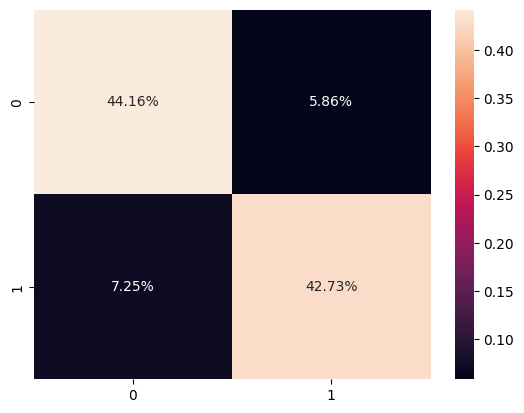

###################- End -###################
#############################################
######-Model => ('RandomForestClassifier', RandomForestClassifier()) 
Test Accuracy :  87.15%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4002
           1       0.88      0.86      0.87      3998

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000

             Confusion_matrix 


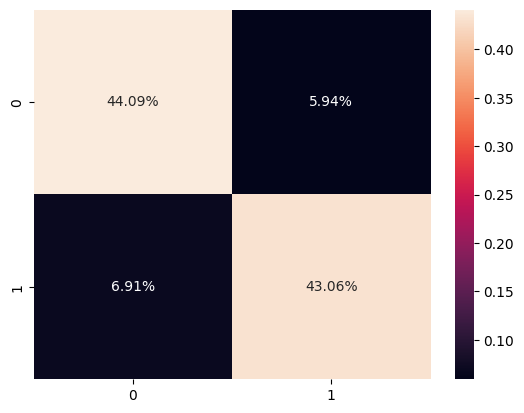

###################- End -###################
#############################################
######-Model => ('MLPClassifier', MLPClassifier(max_iter=1000, random_state=42)) 
Test Accuracy :  84.30%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4002
           1       0.88      0.80      0.84      3998

    accuracy                           0.84      8000
   macro avg       0.85      0.84      0.84      8000
weighted avg       0.85      0.84      0.84      8000

             Confusion_matrix 


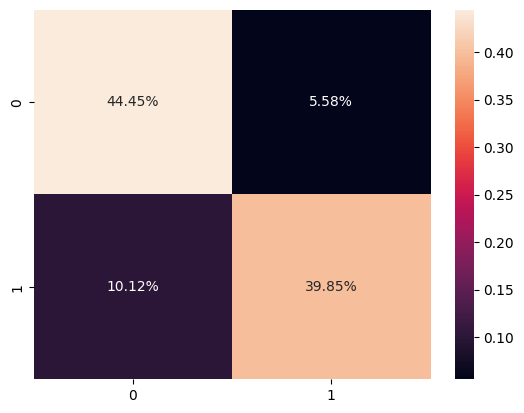

###################- End -###################
#############################################
######-Model => ('LinearSVC', LinearSVC(dual=False, max_iter=10000)) 
Test Accuracy :  65.95%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.62      0.84      0.71      4002
           1       0.75      0.48      0.58      3998

    accuracy                           0.66      8000
   macro avg       0.68      0.66      0.65      8000
weighted avg       0.68      0.66      0.65      8000

             Confusion_matrix 


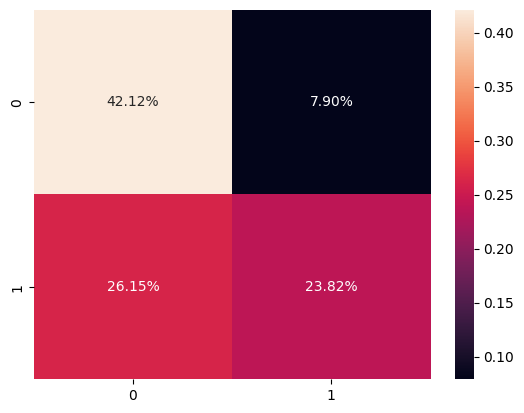

###################- End -###################
#############################################
######-Model => ('GaussianNB', GaussianNB()) 
Test Accuracy :  61.32%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.57      0.98      0.72      4002
           1       0.94      0.24      0.38      3998

    accuracy                           0.61      8000
   macro avg       0.75      0.61      0.55      8000
weighted avg       0.75      0.61      0.55      8000

             Confusion_matrix 


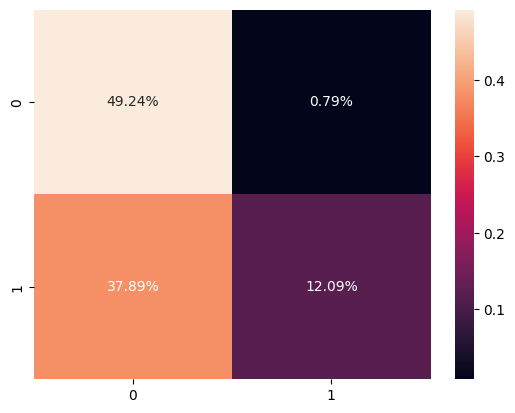

###################- End -###################


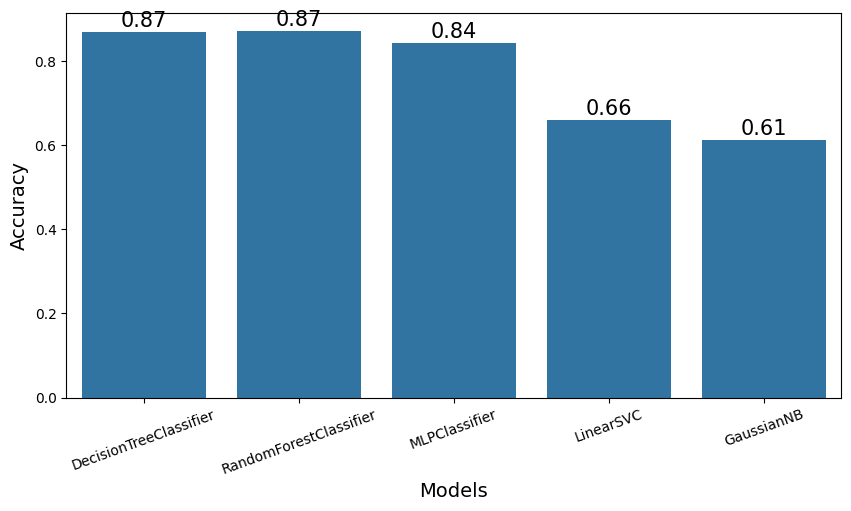

In [ ]:
#test for the bigger dataset
# Remove categorical features from both urldata and urldata_fs
bigurldata = bigurldata.drop(['domain', 'url'], axis=1)
#urldata_fs = urldata_fs.drop(['domain', 'url'], axis=1)

# Separating data and ground truth
bigX = bigurldata.drop(['label'],axis=1)
bigY = bigurldata['label']

# Instantiating training and test set
bigX_train, bigX_test, bigY_train, bigY_test = train_test_split(bigX, bigY, test_size=0.2, shuffle=True, random_state=2)

# Instantiating Models

bigdt = DecisionTreeClassifier()
bigrf = RandomForestClassifier()
bigmlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
biggnb = GaussianNB()
bigsvc = LinearSVC(dual=False, max_iter=10000)

bigmodels = [("DecisionTreeClassifier",bigdt),("RandomForestClassifier",bigrf),
          ("MLPClassifier",bigmlp),("LinearSVC",bigsvc),("GaussianNB",biggnb)]

# Holdout

accuracy_test=[]
for m in bigmodels:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    bigmodel_ = m[1]
    bigmodel_.fit(bigX_train, bigY_train)
    pred = bigmodel_.predict(bigX_test)
    acc = accuracy_score(pred, bigY_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(bigY_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(bigY_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

output = pd.DataFrame({"Model":["DecisionTreeClassifier","RandomForestClassifier", "MLPClassifier","LinearSVC","GaussianNB"],
                    "Accuracy":accuracy_test})

plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

# New URLs real-time tester

In [ ]:
# Tester for models trained on smaller dataset
import ipywidgets as widgets
from IPython.display import display

# Widget per l'input dell'URL
url_input = widgets.Text(
    description='URL:',
    placeholder='Inserisci un URL...'
)

# Pulsante per eseguire la previsione
predict_button = widgets.Button(
    description='Predici',
    button_style='success'
)

# Output per visualizzare i risultati
output = widgets.Output()

# Funzione per eseguire le previsioni e mostrare i risultati
def predict_url(change):
    output.clear_output()
    url = url_input.value

    if not url:
        with output:
            print("⚠️ Inserire un URL valido.")
        return

    feature_names = ['url', 'domain', 'cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth', 'has_number','label']

    #Extracting the feautres & storing them in a list
    example_features = []
    label = 0 # benign

    # Take an URL of example and get the features
    example_features.append(extract_features(url,label))

    example = pd.DataFrame(example_features, columns= feature_names)

    trained_models = {
        'DecisionTreeClassifier': dt,
        'RandomForestClassifier': rf,
        'MLPClassifier': mlp,
        'GaussianNB': gnb,
        'LinearSVC': svc
    }
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    example['cctld'] = le.fit_transform(example['cctld'])
    for feature in ['cctld', 'length', 'has_hyphen', 'underscore_count', 'depth']:
      example[feature] = zscore(urldata[feature])

    # Remove domain and url
    example = example.drop(['domain', 'url'], axis=1)

    # Colleziona le previsioni da tutti i modelli
    predictions = {}
    for model_name, model in trained_models.items():
        prediction = model.predict(example.drop(columns=['label']))
        predictions[model_name] = prediction

    # Mostra i risultati
    with output:
        print(f"Risultati per l'URL: {url}\n")
        for model_name, prediction in predictions.items():
            label = 'Benign' if prediction == 0 else 'Malicious'
            print(f"{model_name}: {label}")

# Collegamento del pulsante alla funzione
predict_button.on_click(predict_url)

# Visualizza i widget
display(url_input, predict_button, output)


Text(value='', description='URL:', placeholder='Inserisci un URL...')

Button(button_style='success', description='Predici', style=ButtonStyle())

Output()

In [ ]:
# Tester for models trained on bigger dataset
import ipywidgets as widgets
from IPython.display import display

# Widget per l'input dell'URL
url_input = widgets.Text(
    description='URL:',
    placeholder='Inserisci un URL...'
)

# Pulsante per eseguire la previsione
predict_button = widgets.Button(
    description='Predici',
    button_style='success'
)

# Output per visualizzare i risultati
output = widgets.Output()

# Funzione per eseguire le previsioni e mostrare i risultati
def predict_url(change):
    output.clear_output()
    url = url_input.value

    if not url:
        with output:
            print("⚠️ Inserire un URL valido.")
        return

    feature_names = ['url', 'domain', 'cctld', 'length', 'have_https', 'have_ip', 'has_hyphen', 'ats_count', 'underscore_count', 'depth','has_number', 'label']

    #Extracting the feautres & storing them in a list
    example_features = []
    label = 0 # benign

    # Take an URL of example and get the features
    example_features.append(extract_features(url,label))

    example = pd.DataFrame(example_features, columns= feature_names)

    trained_models = {
        'DecisionTreeClassifier': bigdt,
        'RandomForestClassifier': bigrf,
        'MLPClassifier': bigmlp,
        'GaussianNB': biggnb,
        'LinearSVC': bigsvc
    }
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    example['cctld'] = le.fit_transform(example['cctld'])
    for feature in ['cctld', 'length', 'has_hyphen', 'underscore_count', 'depth']:
      example[feature] = zscore(urldata[feature])

    # Remove domain and url
    example = example.drop(['domain', 'url'], axis=1)

    # Colleziona le previsioni da tutti i modelli
    predictions = {}
    for model_name, model in trained_models.items():
        prediction = model.predict(example.drop(columns=['label']))
        predictions[model_name] = prediction

    # Mostra i risultati
    with output:
        print(f"Risultati per l'URL: {url}\n")
        for model_name, prediction in predictions.items():
            label = 'Benign' if prediction == 0 else 'Malicious'
            print(f"{model_name}: {label}")

# Collegamento del pulsante alla funzione
predict_button.on_click(predict_url)

# Visualizza i widget
display(url_input, predict_button, output)


Text(value='', description='URL:', placeholder='Inserisci un URL...')

Button(button_style='success', description='Predici', style=ButtonStyle())

Output()